# **Project Name : ✨ Lung Cancer Data Analysis ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Interoduction :**

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

The study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

The researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. They also found that the risk was higher in nonsmokers than smokers, and that the risk increased with age.

**Columns Descriptions :**

**Age :** The age of the patient. (Numeric).

**Gender :** The gender of the patient. (Categorical).

**Air Pollution :** The level of air pollution exposure of the patient. (Categorical).

**Alcohol use :** The level of alcohol use of the patient. (Categorical).

**Dust Allergy :** The level of dust allergy of the patient. (Categorical).

**OccuPational Hazards :** The level of occupational hazards of the patient. (Categorical).

**Genetic Risk :** The level of genetic risk of the patient. (Categorical).

**chronic Lung Disease :** The level of chronic lung disease of the patient. (Categorical).

**Balanced Diet :** The level of balanced diet of the patient. (Categorical).

**Obesity :** The level of obesity of the patient. (Categorical).

**Smoking :** The level of smoking of the patient. (Categorical).

**Passive Smoker :** The level of passive smoker of the patient. (Categorical).

**Chest Pain :** The level of chest pain of the patient. (Categorical).

**Coughing of Blood :** The level of coughing of blood of the patient. (Categorical).

**Fatigue :** The level of fatigue of the patient. (Categorical).

**Weight Loss :** The level of weight loss of the patient. (Categorical).

**Shortness of Breath :** The level of shortness of breath of the patient. (Categorical).

**Wheezing :** The level of wheezing of the patient. (Categorical).

**Swallowing Difficulty :** The level of swallowing difficulty of the patient. (Categorical).

**Clubbing of Finger Nails :** The level of clubbing of finger nails of the patient. (Categorical).

# **Import Libraries**

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.feature_selection import mutual_info_classif

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# **Load Dataset**

In [111]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Lung Cancer Dataset/cancer patient data sets.csv")
df.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [112]:
df.shape

(1000, 26)

In [113]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [115]:
df.describe()

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

# **Univeriate Analysis**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

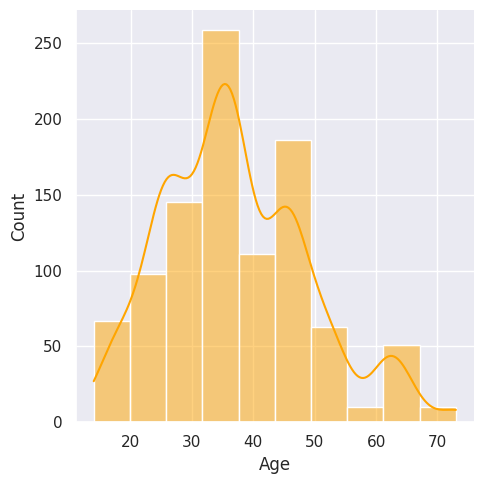

In [117]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Age"], kde=True, color="orange", bins=10)

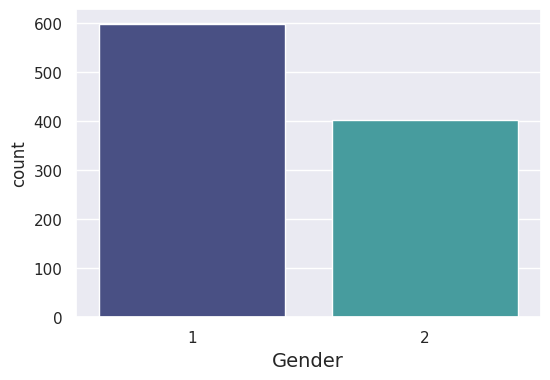

In [118]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Gender", data=df, palette="mako")
plt.xlabel("Gender", fontsize=14)
plt.show()

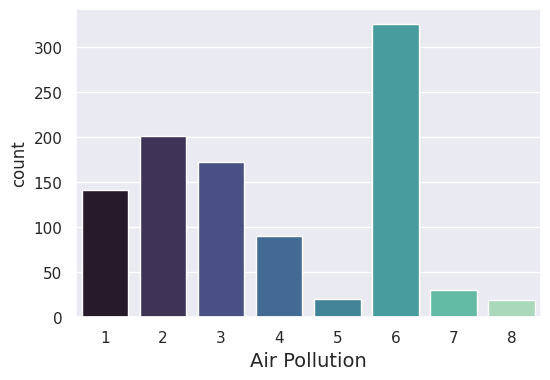

In [119]:
plt.figure(figsize=(6,4))
sns.countplot(x="Air Pollution", data=df, palette="mako")
plt.xlabel("Air Pollution", fontsize=14)
plt.show()

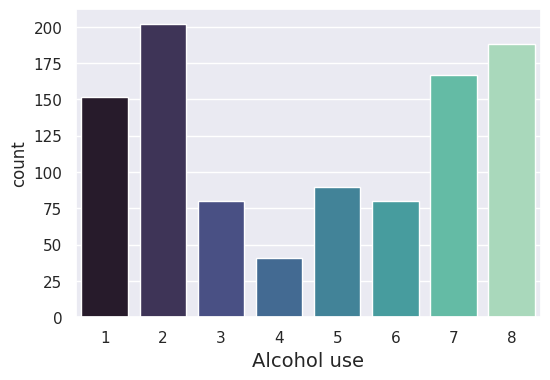

In [120]:
plt.figure(figsize=(6,4))
sns.countplot(x="Alcohol use", data=df, palette="mako")
plt.xlabel("Alcohol use", fontsize=14)
plt.show()

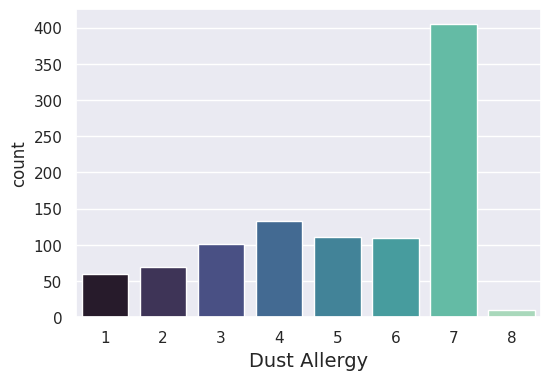

In [121]:
plt.figure(figsize=(6,4))
sns.countplot(x="Dust Allergy", data=df, palette="mako")
plt.xlabel("Dust Allergy", fontsize=14)
plt.show()

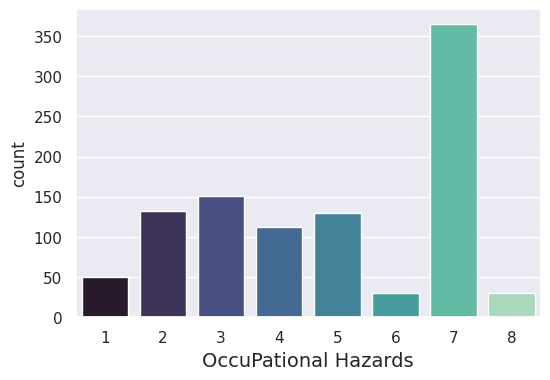

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x="OccuPational Hazards", data=df, palette="mako")
plt.xlabel("OccuPational Hazards", fontsize=14)
plt.show()

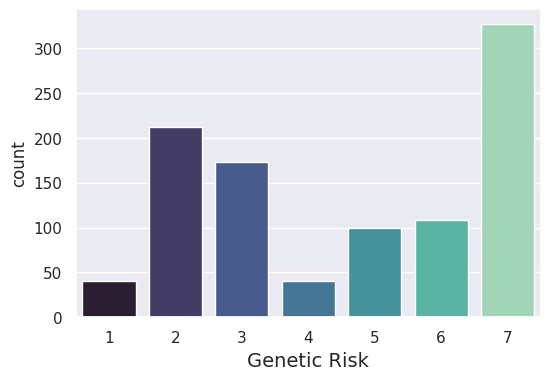

In [123]:
plt.figure(figsize=(6,4))
sns.countplot(x="Genetic Risk", data=df, palette="mako")
plt.xlabel("Genetic Risk", fontsize=14)
plt.show()

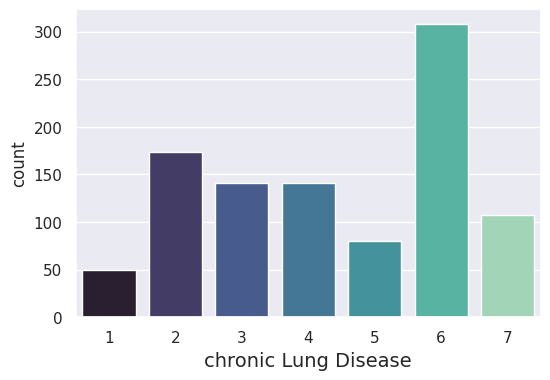

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(x="chronic Lung Disease", data=df, palette="mako")
plt.xlabel("chronic Lung Disease", fontsize=14)
plt.show()

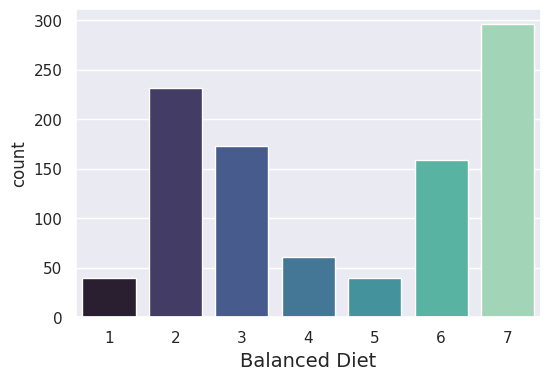

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x="Balanced Diet", data=df, palette="mako")
plt.xlabel("Balanced Diet", fontsize=14)
plt.show()

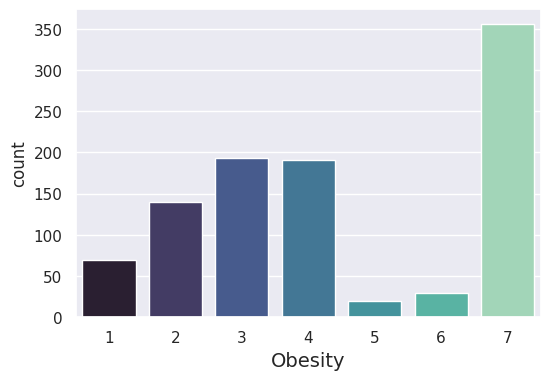

In [126]:
plt.figure(figsize=(6,4))
sns.countplot(x="Obesity", data=df, palette="mako")
plt.xlabel("Obesity", fontsize=14)
plt.show()

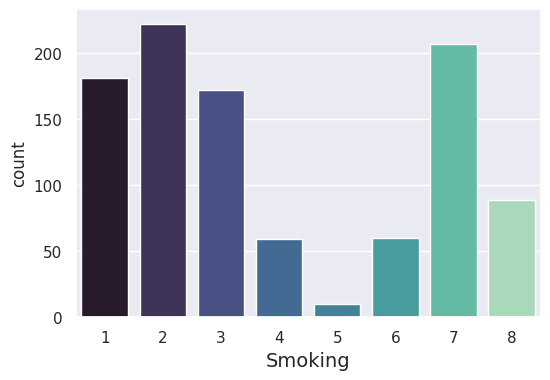

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(x="Smoking", data=df, palette="mako")
plt.xlabel("Smoking", fontsize=14)
plt.show()

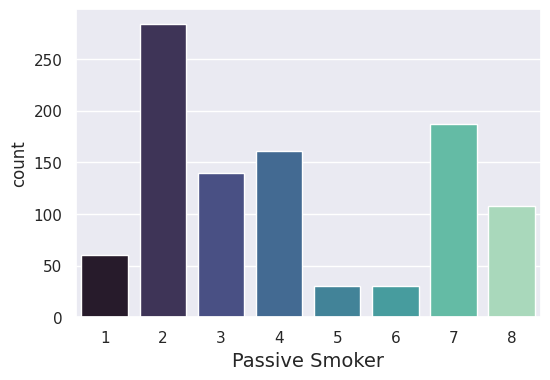

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(x="Passive Smoker", data=df, palette="mako")
plt.xlabel("Passive Smoker", fontsize=14)
plt.show()

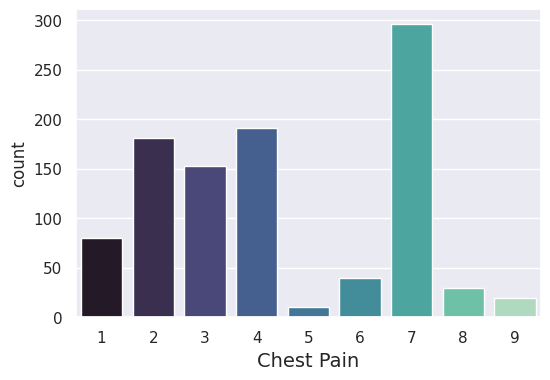

In [129]:
plt.figure(figsize=(6,4))
sns.countplot(x="Chest Pain", data=df, palette="mako")
plt.xlabel("Chest Pain", fontsize=14)
plt.show()

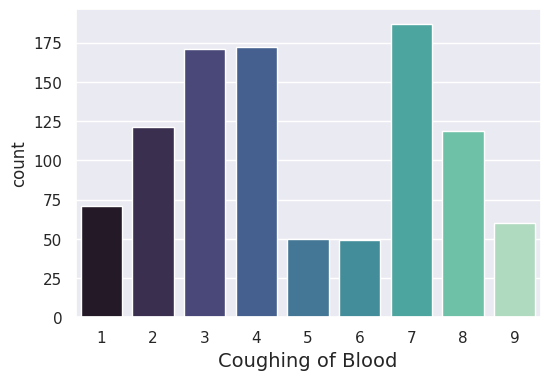

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(x="Coughing of Blood", data=df, palette="mako")
plt.xlabel("Coughing of Blood", fontsize=14)
plt.show()

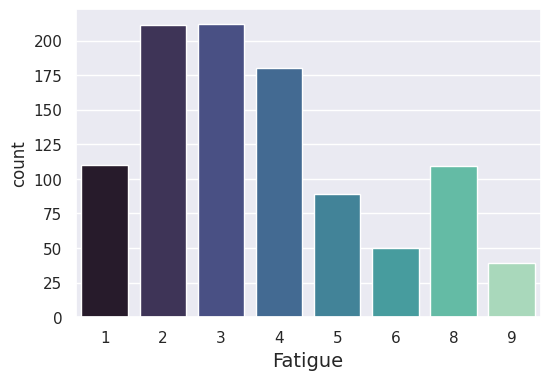

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fatigue", data=df, palette="mako")
plt.xlabel("Fatigue", fontsize=14)
plt.show()

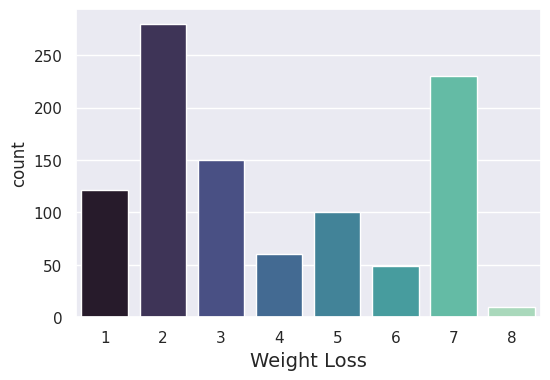

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(x="Weight Loss", data=df, palette="mako")
plt.xlabel("Weight Loss", fontsize=14)
plt.show()

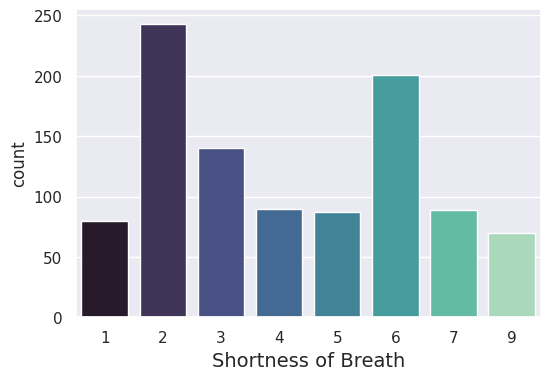

In [133]:
plt.figure(figsize=(6,4))
sns.countplot(x="Shortness of Breath", data=df, palette="mako")
plt.xlabel("Shortness of Breath", fontsize=14)
plt.show()

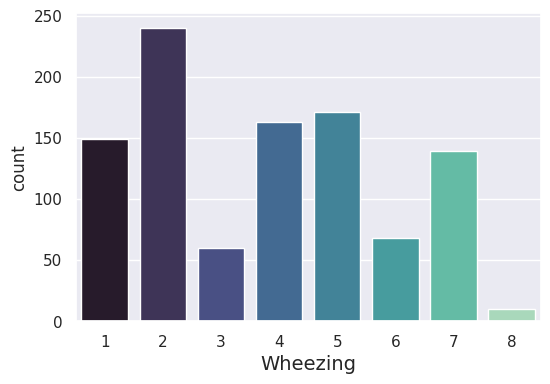

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(x="Wheezing", data=df, palette="mako")
plt.xlabel("Wheezing", fontsize=14)
plt.show()

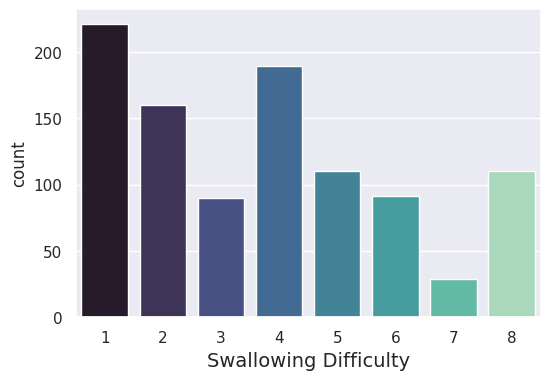

In [135]:
plt.figure(figsize=(6,4))
sns.countplot(x="Swallowing Difficulty", data=df, palette="mako")
plt.xlabel("Swallowing Difficulty", fontsize=14)
plt.show()

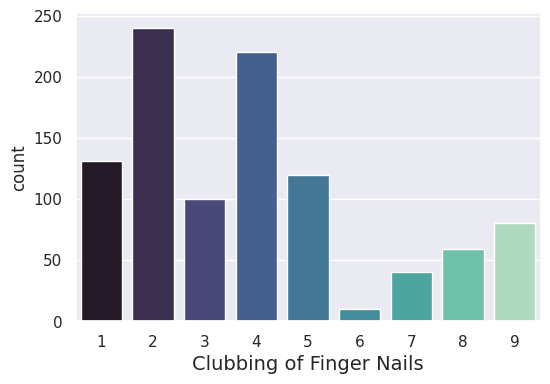

In [136]:
plt.figure(figsize=(6,4))
sns.countplot(x="Clubbing of Finger Nails", data=df, palette="mako")
plt.xlabel("Clubbing of Finger Nails", fontsize=14)
plt.show()

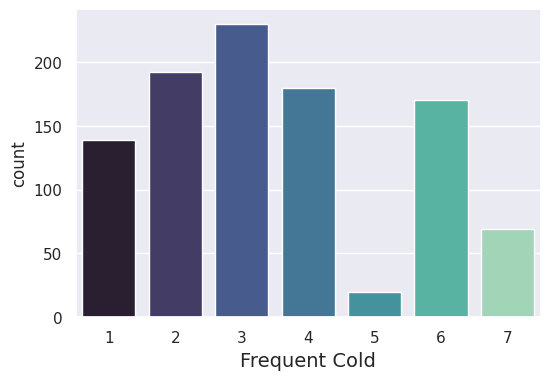

In [137]:
plt.figure(figsize=(6,4))
sns.countplot(x="Frequent Cold", data=df, palette="mako")
plt.xlabel("Frequent Cold", fontsize=14)
plt.show()

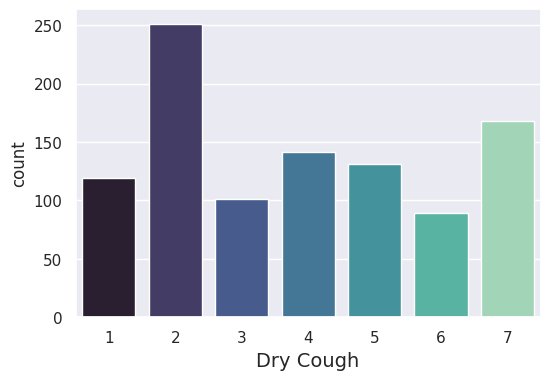

In [138]:
plt.figure(figsize=(6,4))
sns.countplot(x="Dry Cough", data=df, palette="mako")
plt.xlabel("Dry Cough", fontsize=14)
plt.show()

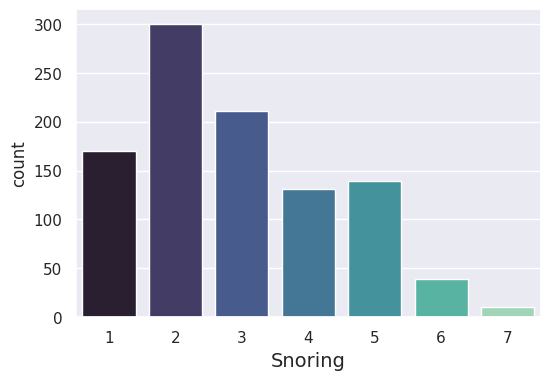

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(x="Snoring", data=df, palette="mako")
plt.xlabel("Snoring", fontsize=14)
plt.show()

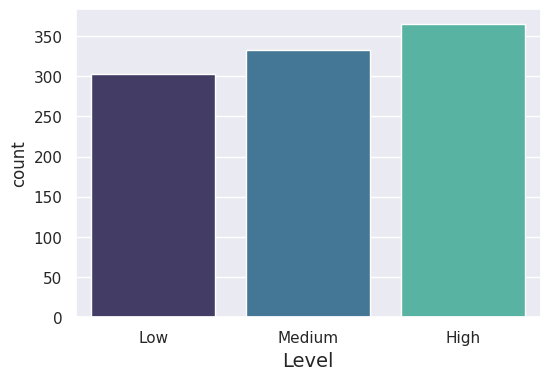

In [140]:
plt.figure(figsize=(6,4))
sns.countplot(x="Level", data=df, palette="mako")
plt.xlabel("Level", fontsize=14)
plt.show()

# **EDA (Exploratory Data Analysis)**

#### **Check and Remove Duplicate**

In [141]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Check and Remove NaN Values**

In [142]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

#### **Remove Outlier**

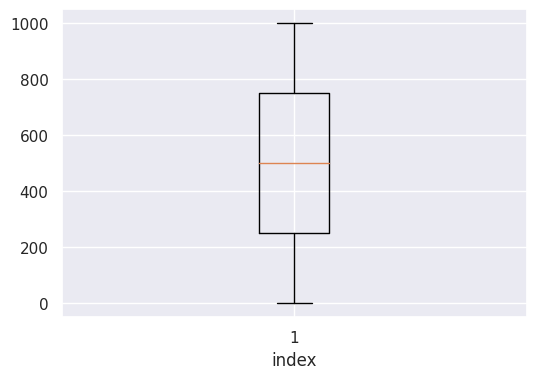

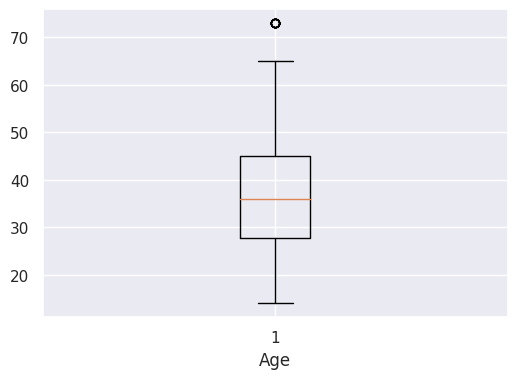

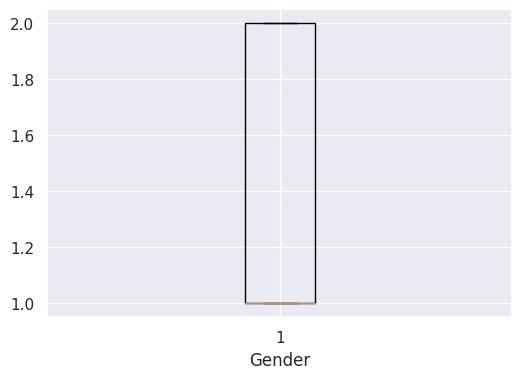

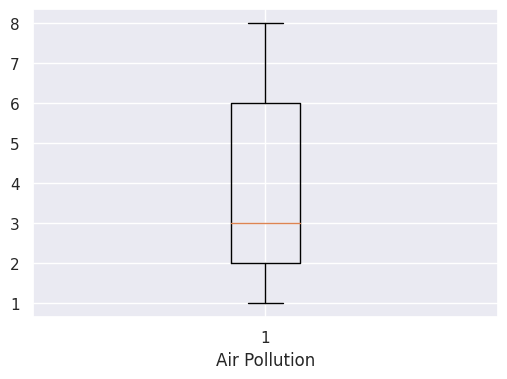

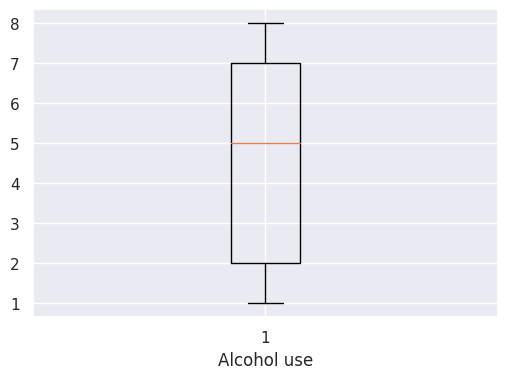

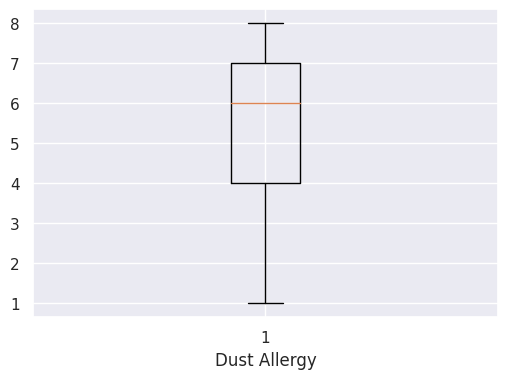

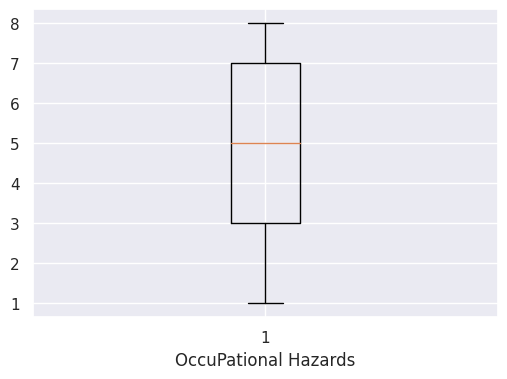

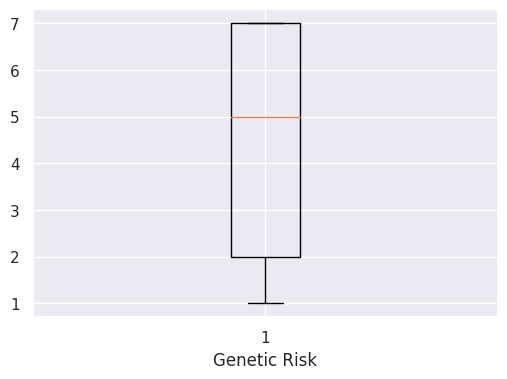

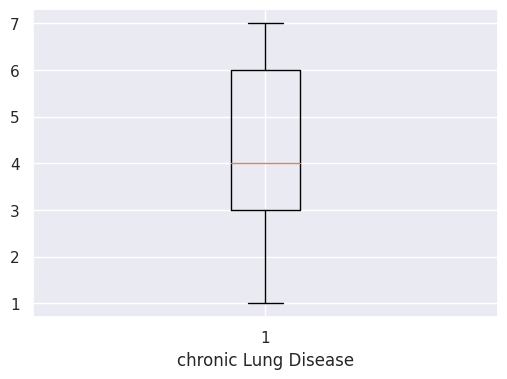

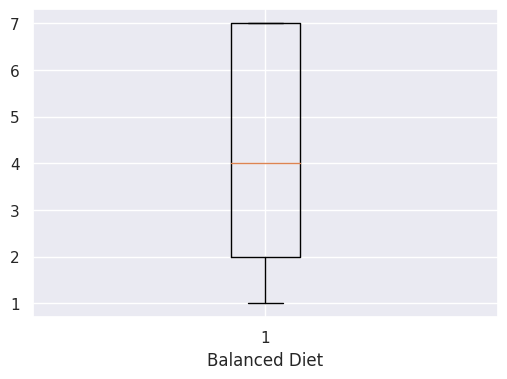

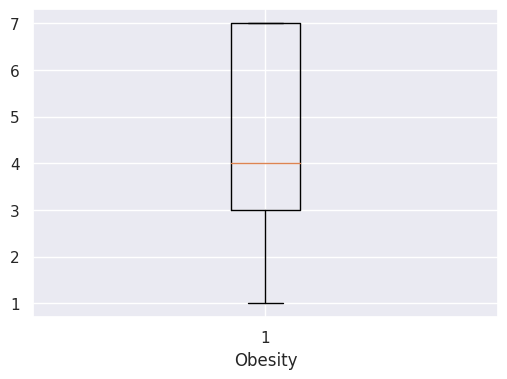

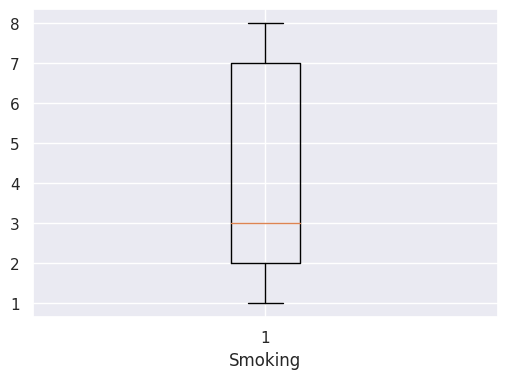

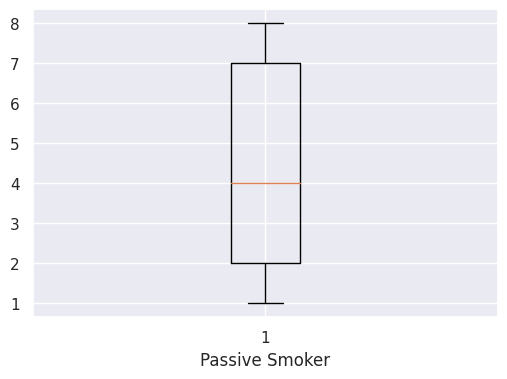

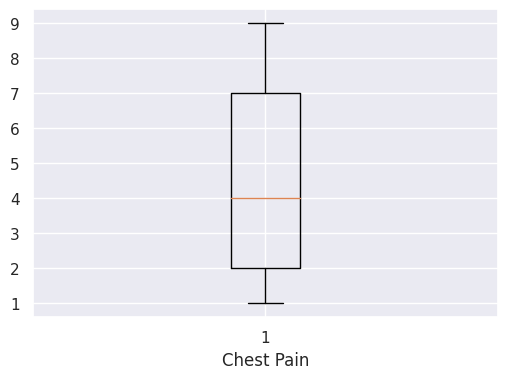

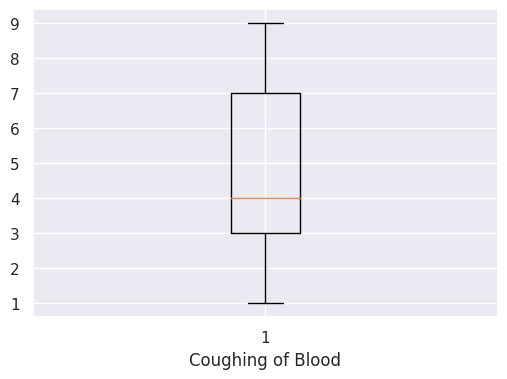

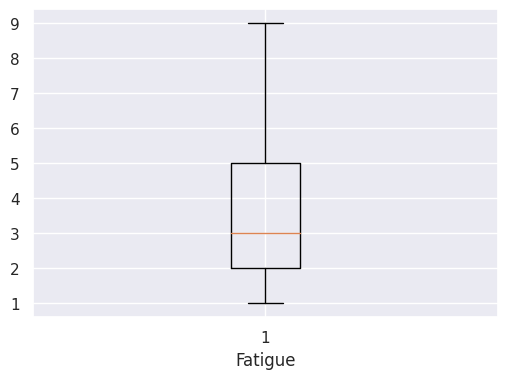

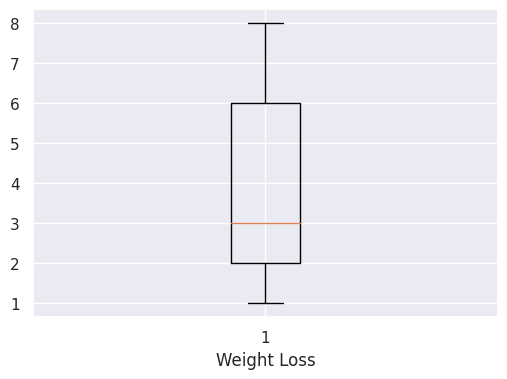

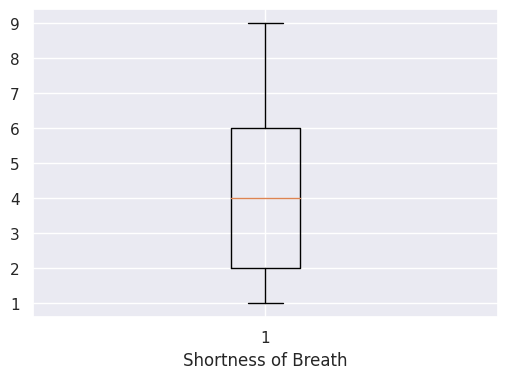

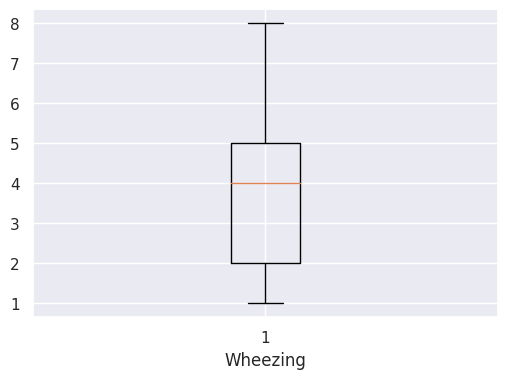

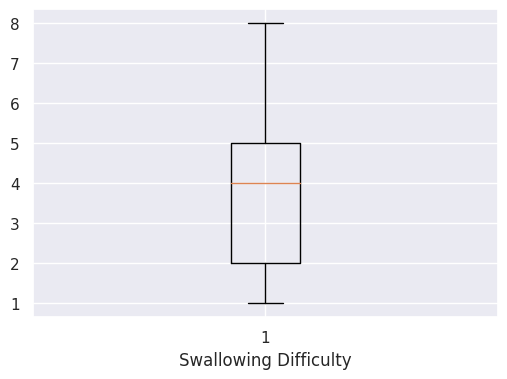

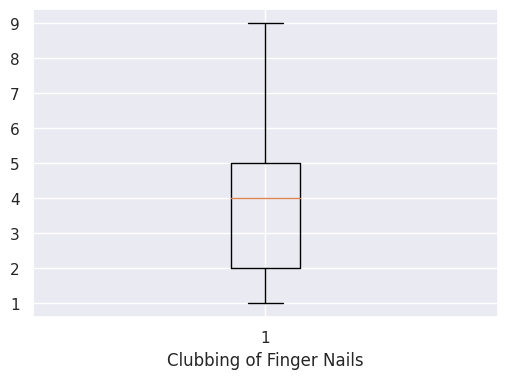

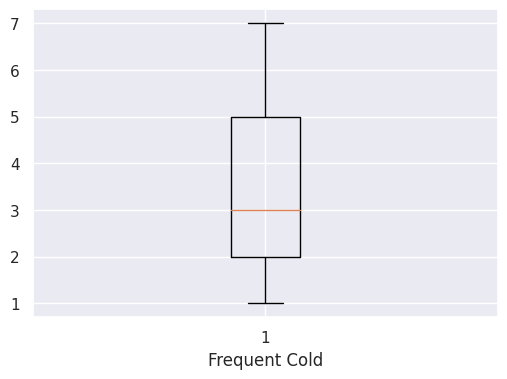

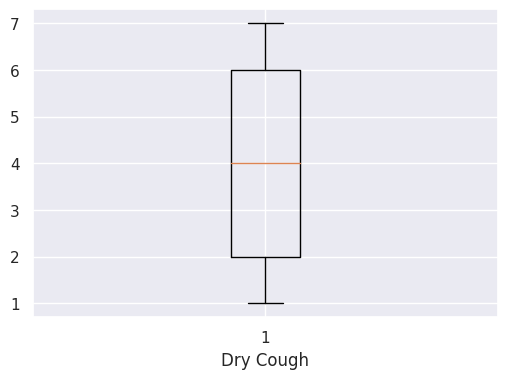

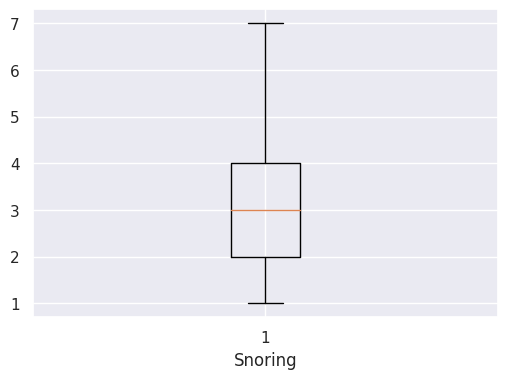

In [143]:
num_cols =df.select_dtypes(["float64","int64"])
for i in num_cols.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [144]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [145]:
lower_range, upper_range = remove_outlier(df["Age"])
df["Age"] = np.where(df["Age"] > upper_range, lower_range, df["Age"])
df["Age"] = np.where(df["Age"] < lower_range, upper_range, df['Age'])

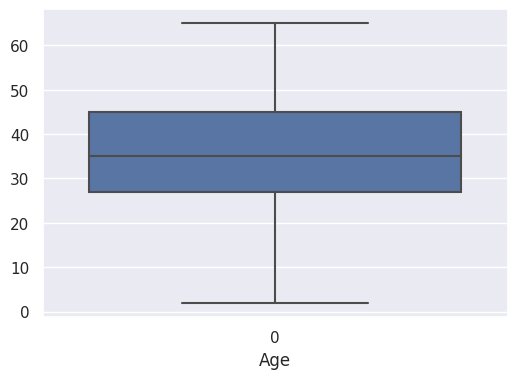

In [146]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.show()

#### **Bivariate Analysis**

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   Patient Id                1000 non-null   object 
 2   Age                       1000 non-null   float64
 3   Gender                    1000 non-null   int64  
 4   Air Pollution             1000 non-null   int64  
 5   Alcohol use               1000 non-null   int64  
 6   Dust Allergy              1000 non-null   int64  
 7   OccuPational Hazards      1000 non-null   int64  
 8   Genetic Risk              1000 non-null   int64  
 9   chronic Lung Disease      1000 non-null   int64  
 10  Balanced Diet             1000 non-null   int64  
 11  Obesity                   1000 non-null   int64  
 12  Smoking                   1000 non-null   int64  
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

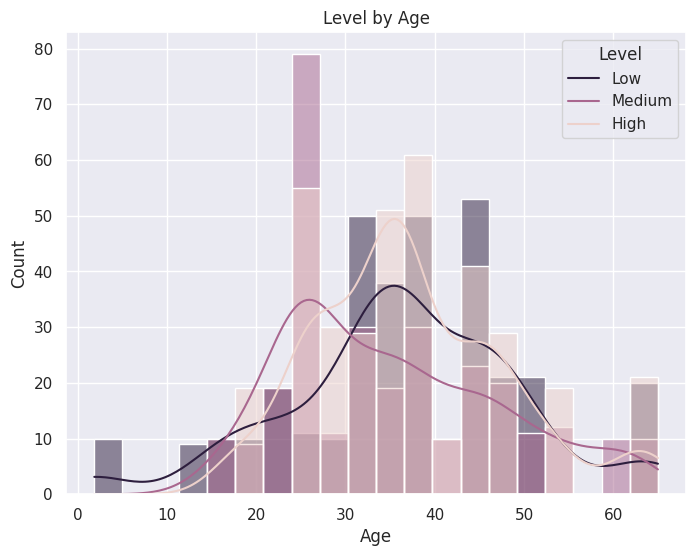

In [277]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Level', kde=True, bins=20)
plt.title('Level by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right', labels=['Low', 'Medium',"High"])
plt.show()

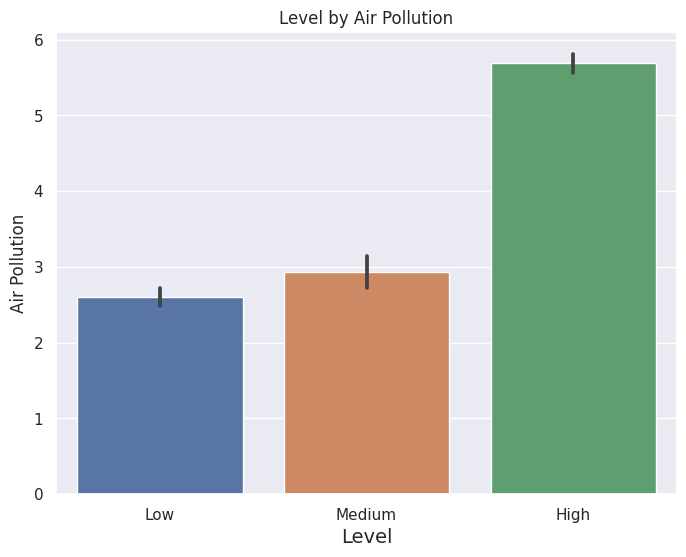

In [149]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Air Pollution', data=df)
plt.title('Level by Air Pollution')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Air Pollution')
plt.show()

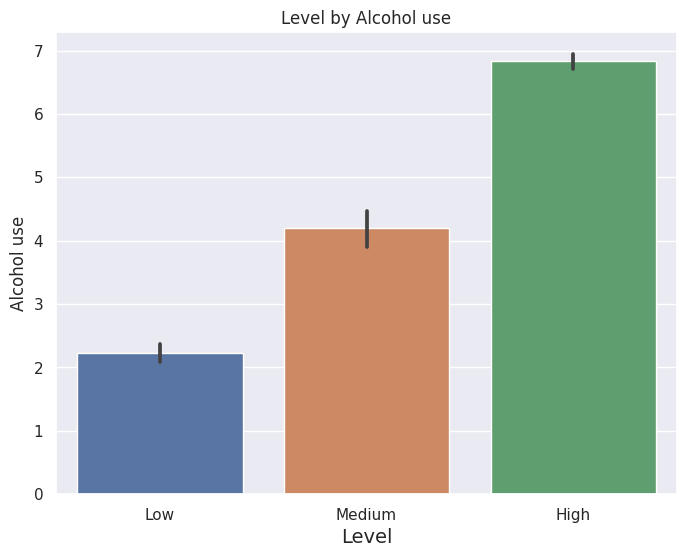

In [150]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Alcohol use', data=df)
plt.title('Level by Alcohol use')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Alcohol use')
plt.show()

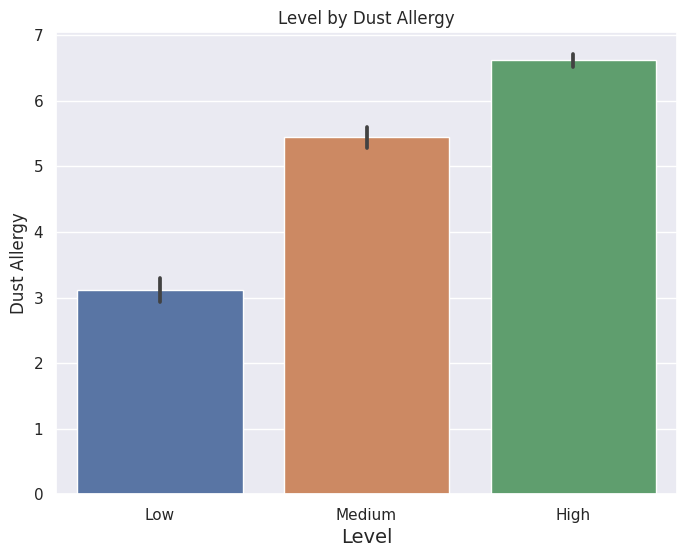

In [151]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Dust Allergy', data=df)
plt.title('Level by Dust Allergy')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Dust Allergy')
plt.show()

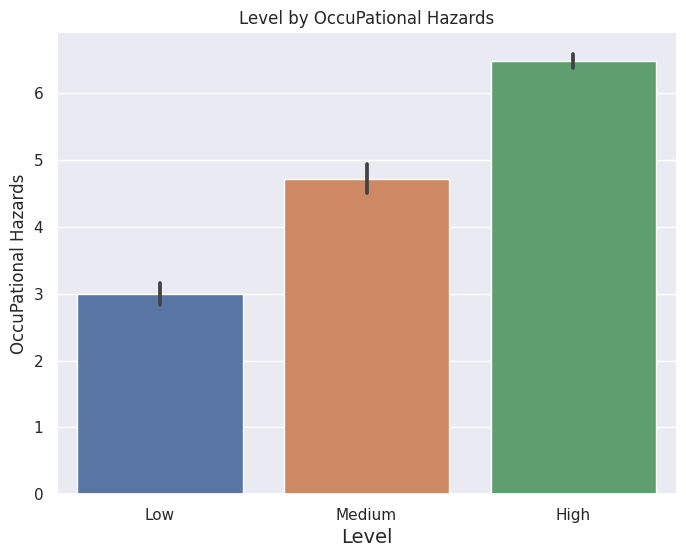

In [152]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='OccuPational Hazards', data=df)
plt.title('Level by OccuPational Hazards')
plt.xlabel('Level', fontsize=14)
plt.ylabel('OccuPational Hazards')
plt.show()

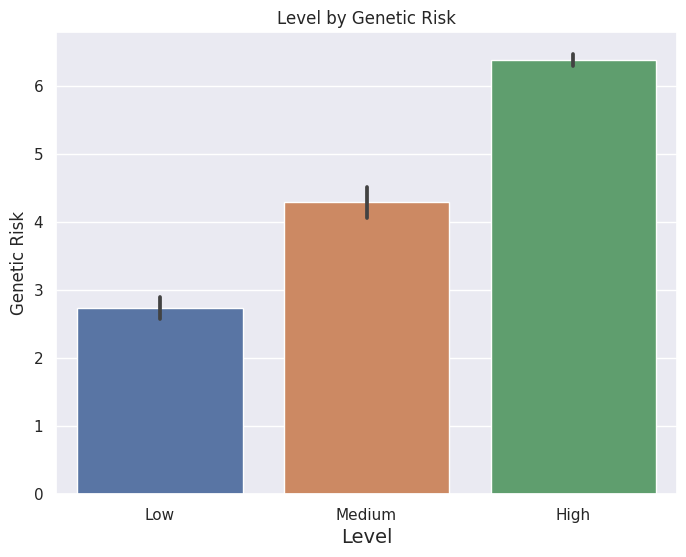

In [153]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Genetic Risk', data=df)
plt.title('Level by Genetic Risk')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Genetic Risk')
plt.show()

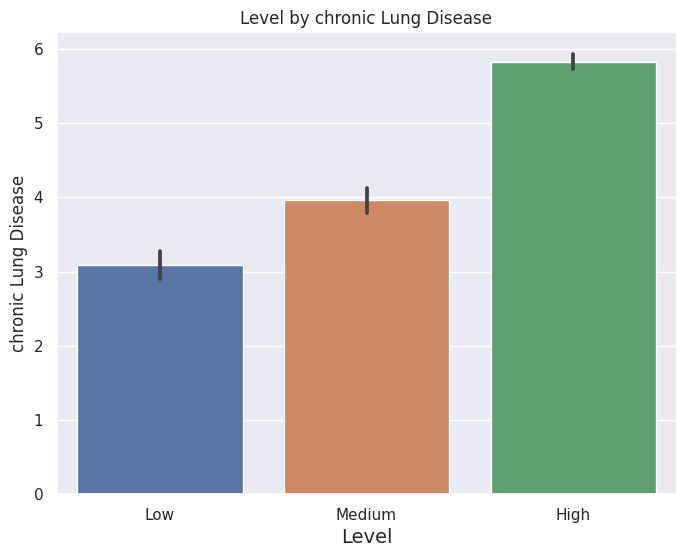

In [154]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='chronic Lung Disease', data=df)
plt.title('Level by chronic Lung Disease')
plt.xlabel('Level', fontsize=14)
plt.ylabel('chronic Lung Disease')
plt.show()

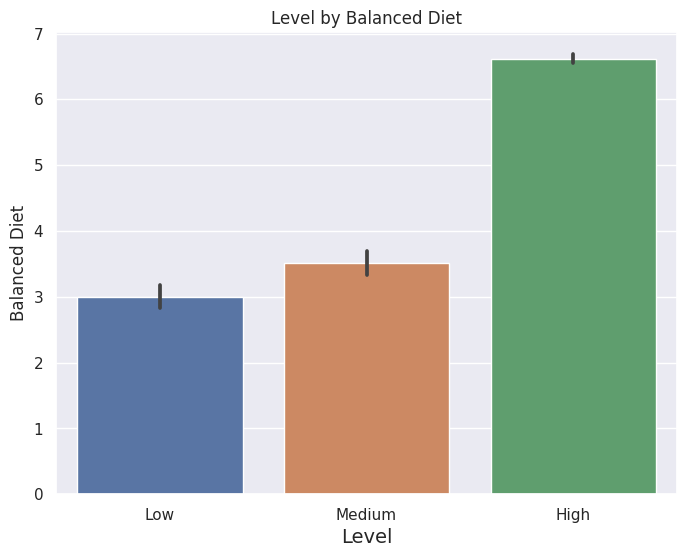

In [155]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Balanced Diet', data=df)
plt.title('Level by Balanced Diet')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Balanced Diet')
plt.show()

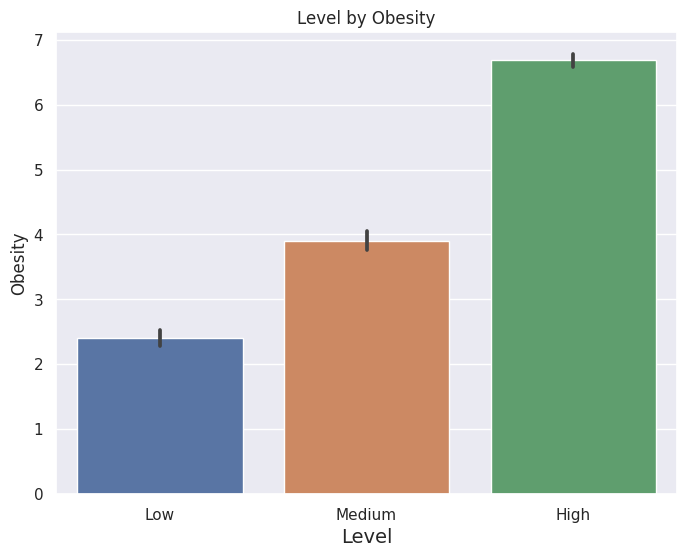

In [156]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Obesity', data=df)
plt.title('Level by Obesity')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Obesity')
plt.show()

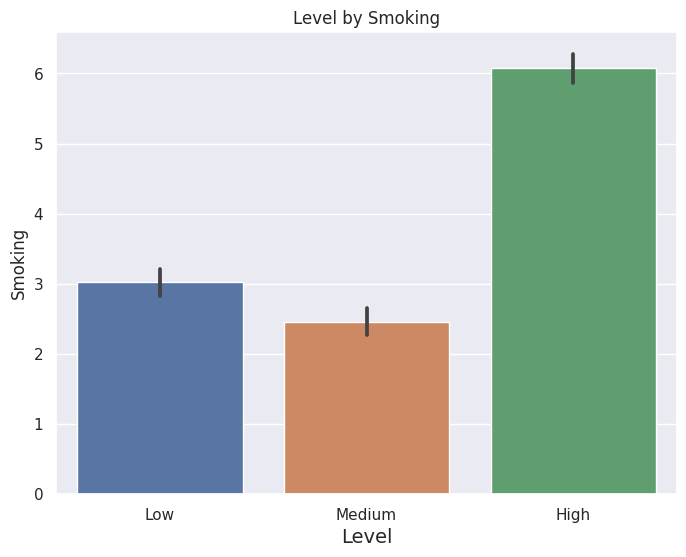

In [157]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Smoking', data=df)
plt.title('Level by Smoking')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Smoking')
plt.show()

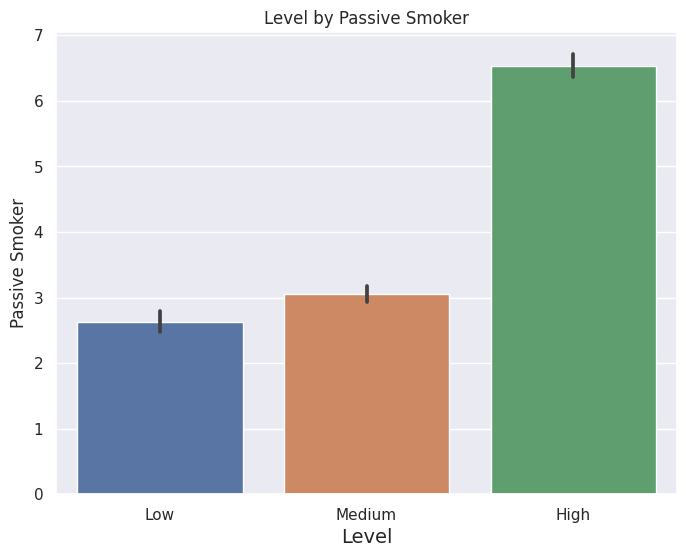

In [158]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Passive Smoker', data=df)
plt.title('Level by Passive Smoker')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Passive Smoker')
plt.show()

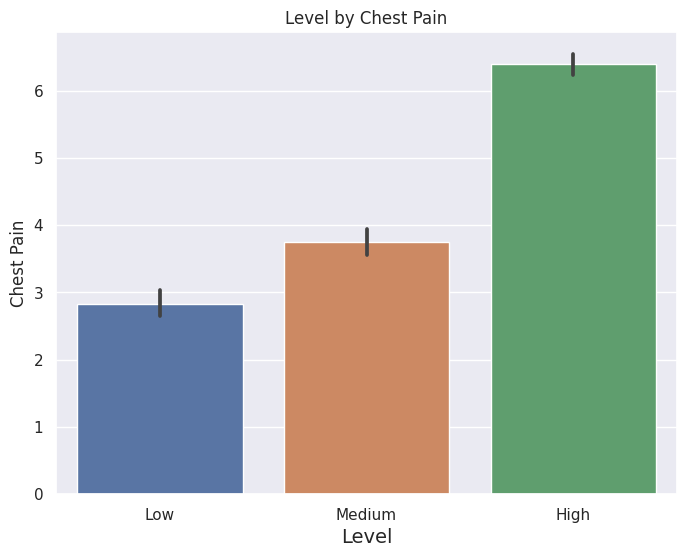

In [159]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Chest Pain', data=df)
plt.title('Level by Chest Pain')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Chest Pain')
plt.show()

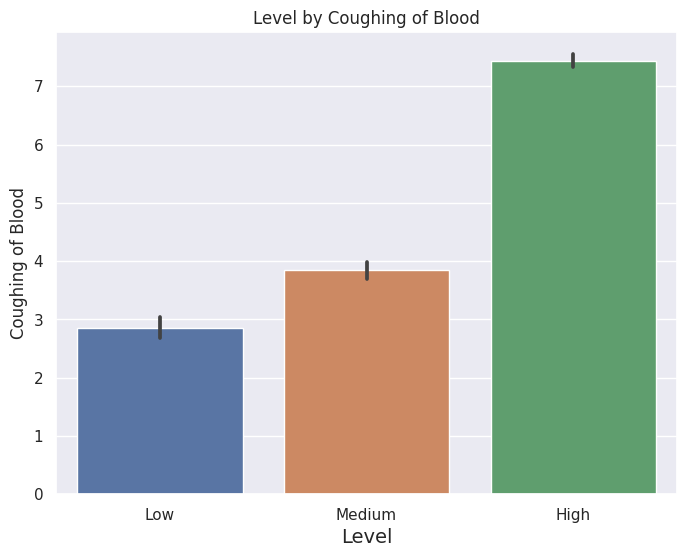

In [160]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Coughing of Blood', data=df)
plt.title('Level by Coughing of Blood')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Coughing of Blood')
plt.show()

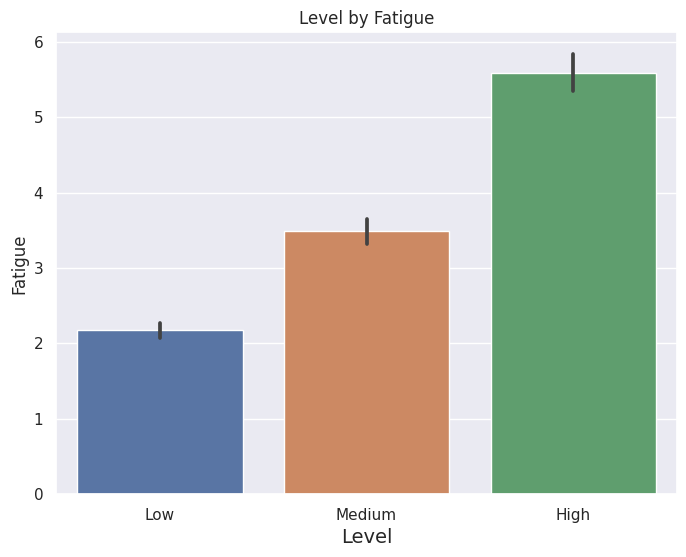

In [161]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Fatigue', data=df)
plt.title('Level by Fatigue')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Fatigue')
plt.show()

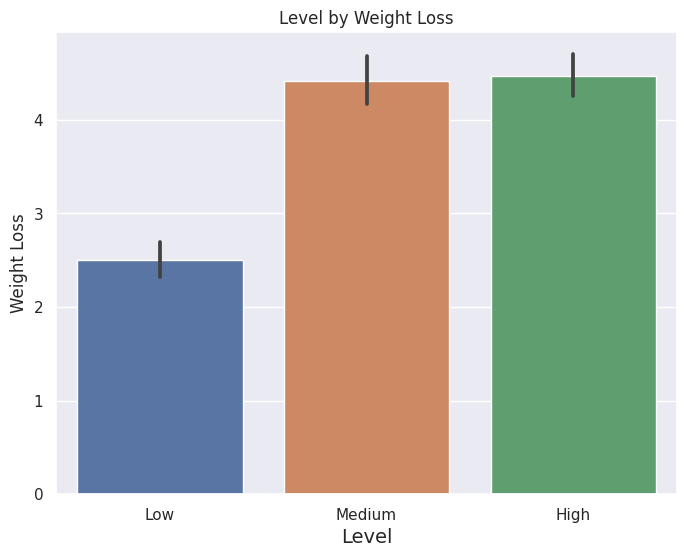

In [162]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Weight Loss', data=df)
plt.title('Level by Weight Loss')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Weight Loss')
plt.show()

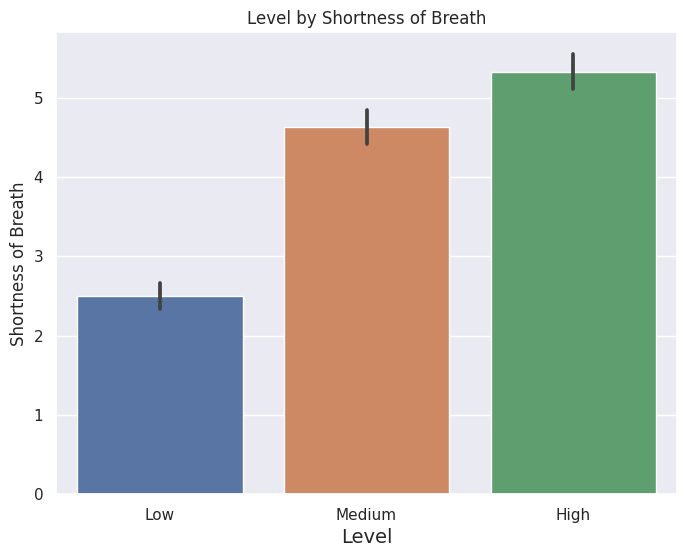

In [163]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Shortness of Breath', data=df)
plt.title('Level by Shortness of Breath')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Shortness of Breath')
plt.show()

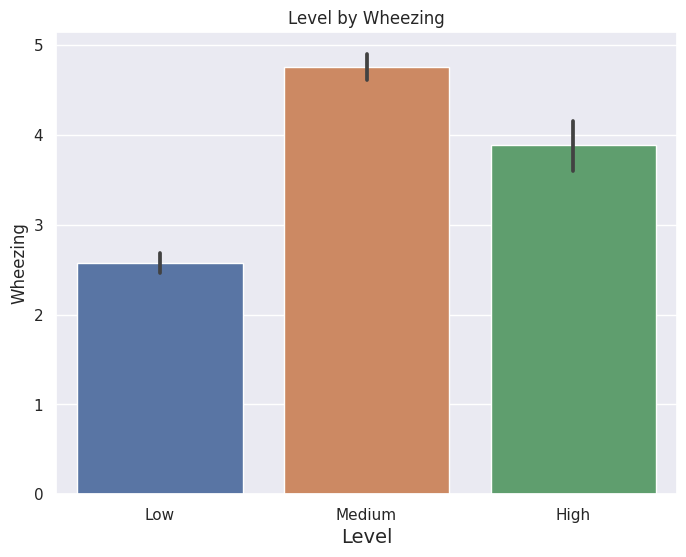

In [164]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Wheezing', data=df)
plt.title('Level by Wheezing')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Wheezing')
plt.show()

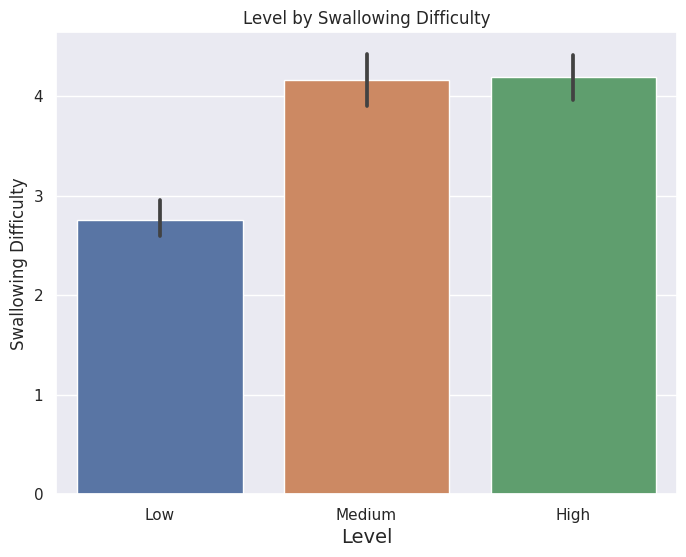

In [165]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Swallowing Difficulty', data=df)
plt.title('Level by Swallowing Difficulty')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Swallowing Difficulty')
plt.show()

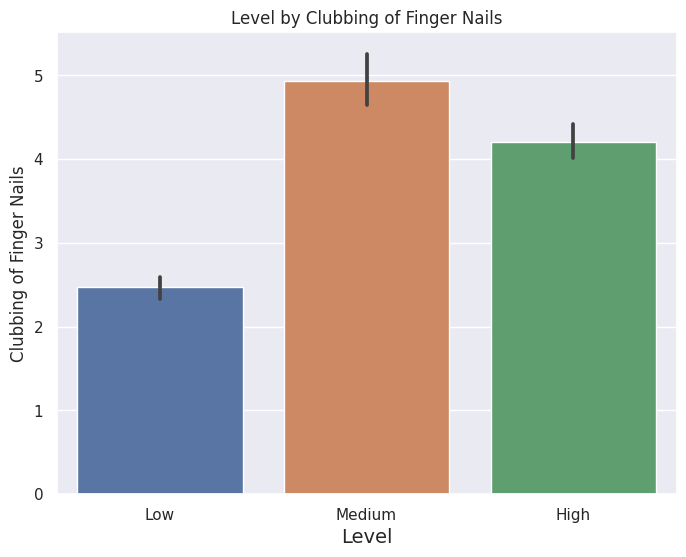

In [166]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Clubbing of Finger Nails', data=df)
plt.title('Level by Clubbing of Finger Nails')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Clubbing of Finger Nails')
plt.show()

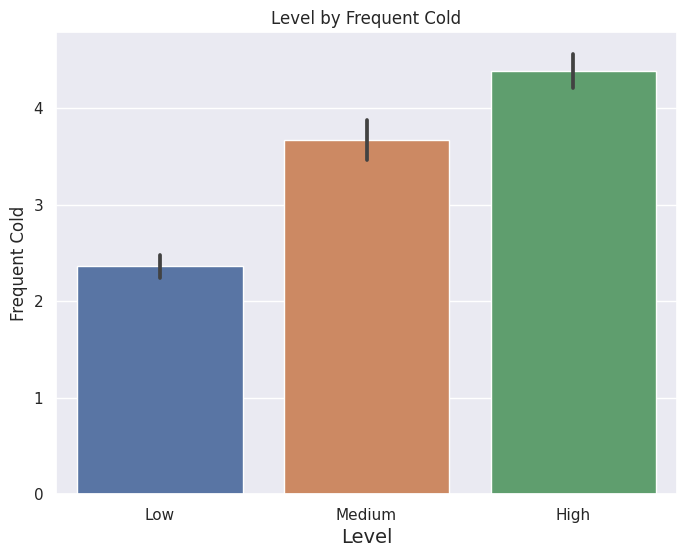

In [167]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Frequent Cold', data=df)
plt.title('Level by Frequent Cold')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Frequent Cold')
plt.show()

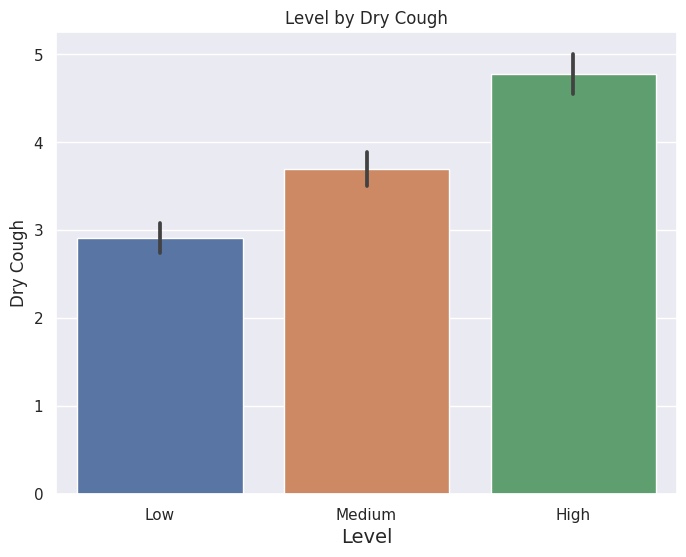

In [168]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Dry Cough', data=df)
plt.title('Level by Dry Cough')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Dry Cough')
plt.show()

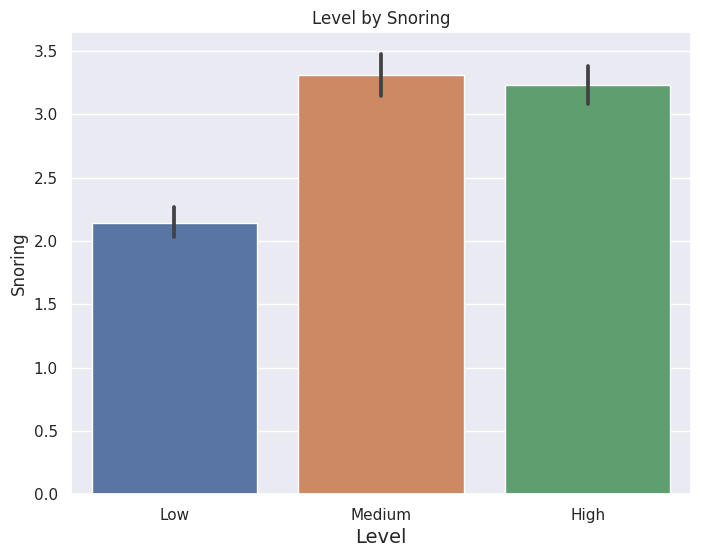

In [169]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Level', y='Snoring', data=df)
plt.title('Level by Snoring')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Snoring')
plt.show()

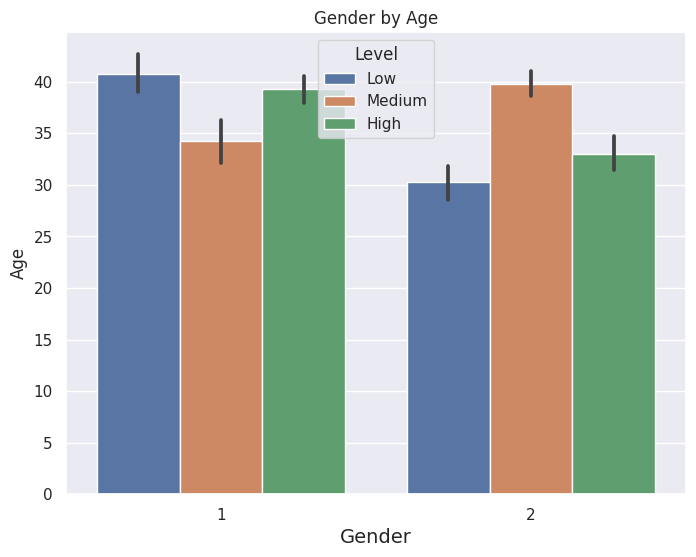

In [170]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age',hue="Level", data=df)
plt.title('Gender by Age')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age')
plt.show()

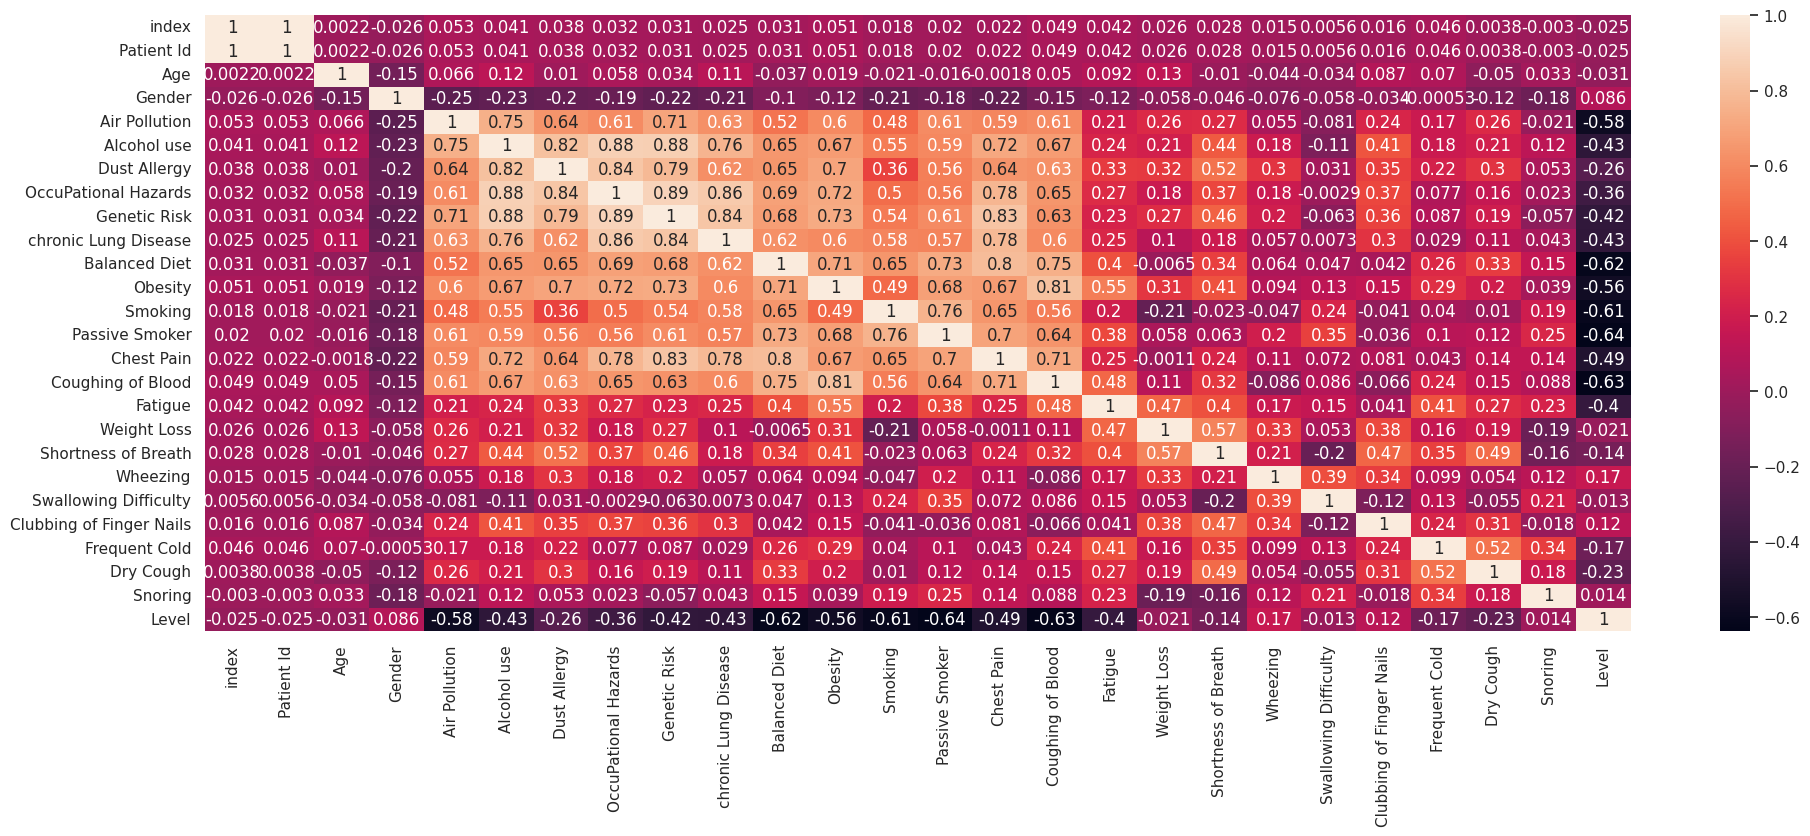

In [278]:
plt.figure(figsize=(23,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


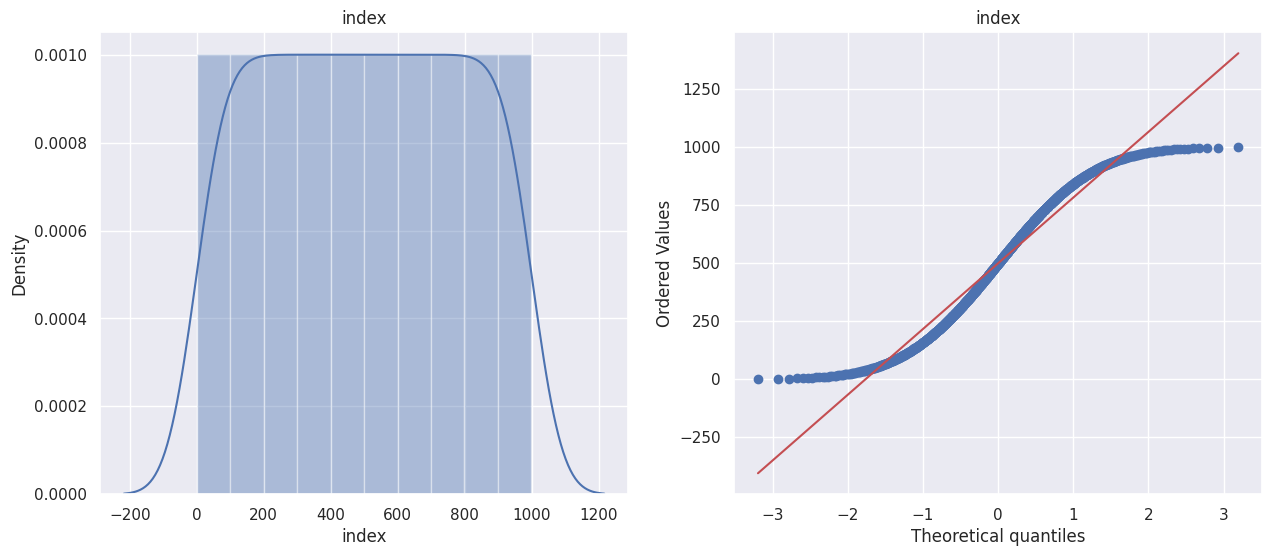

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


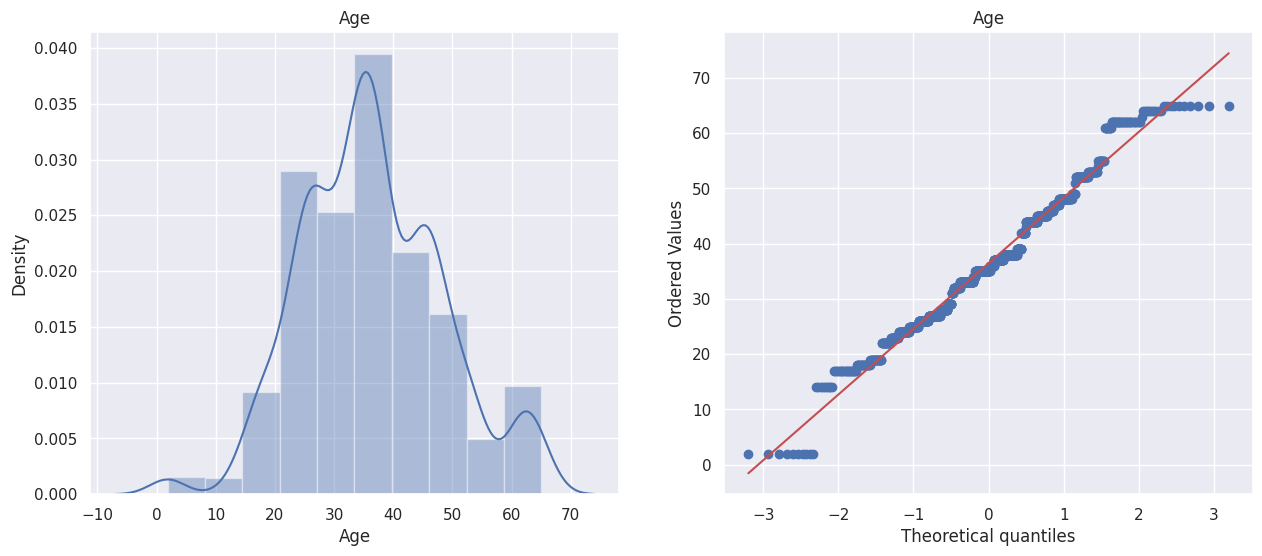

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


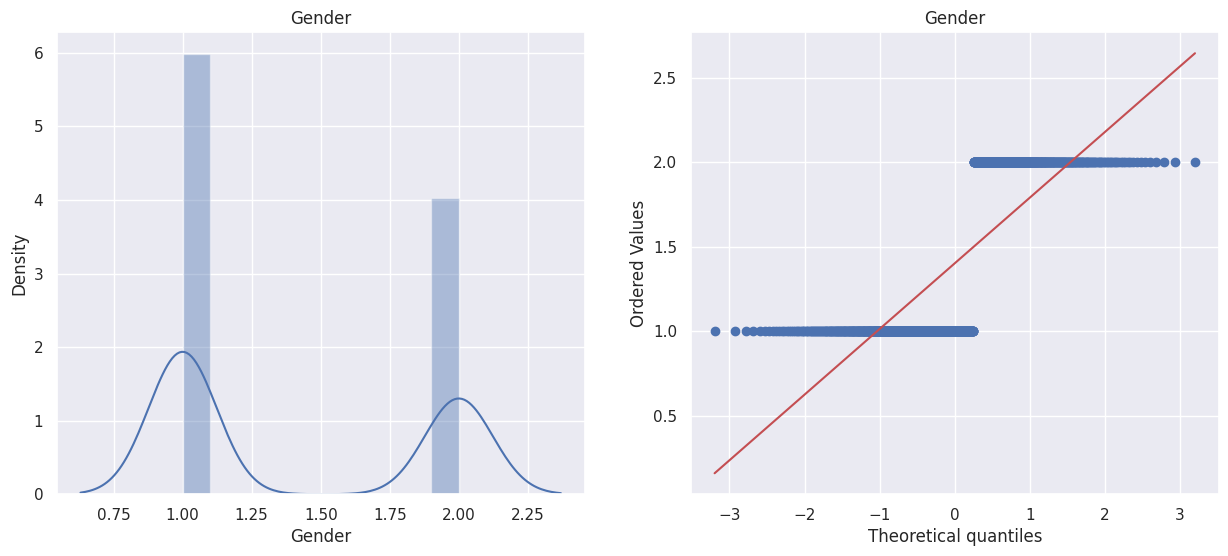

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


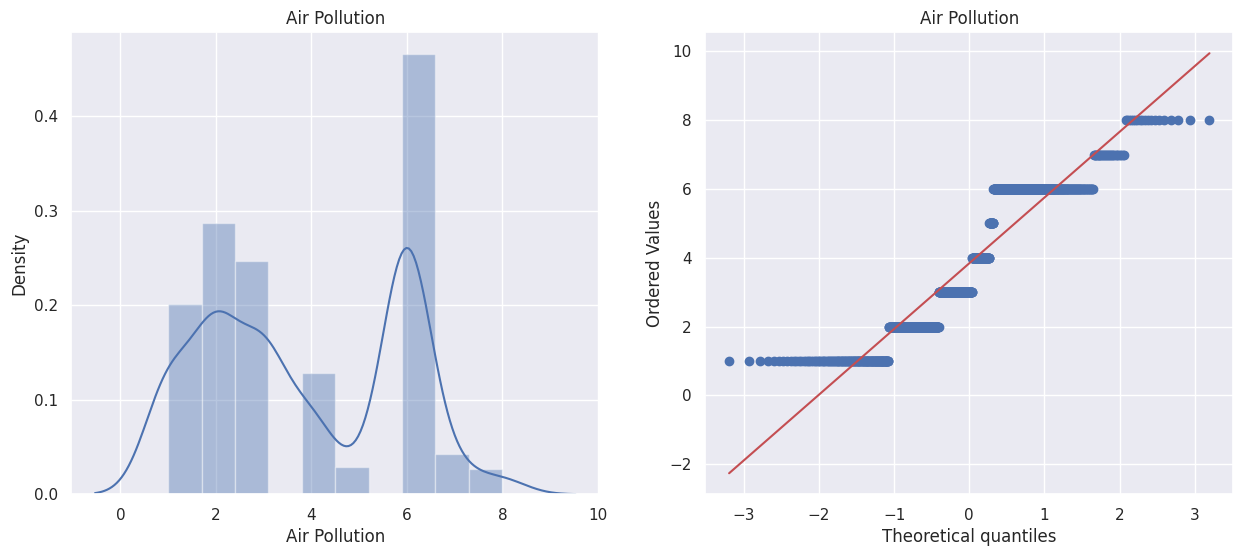

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


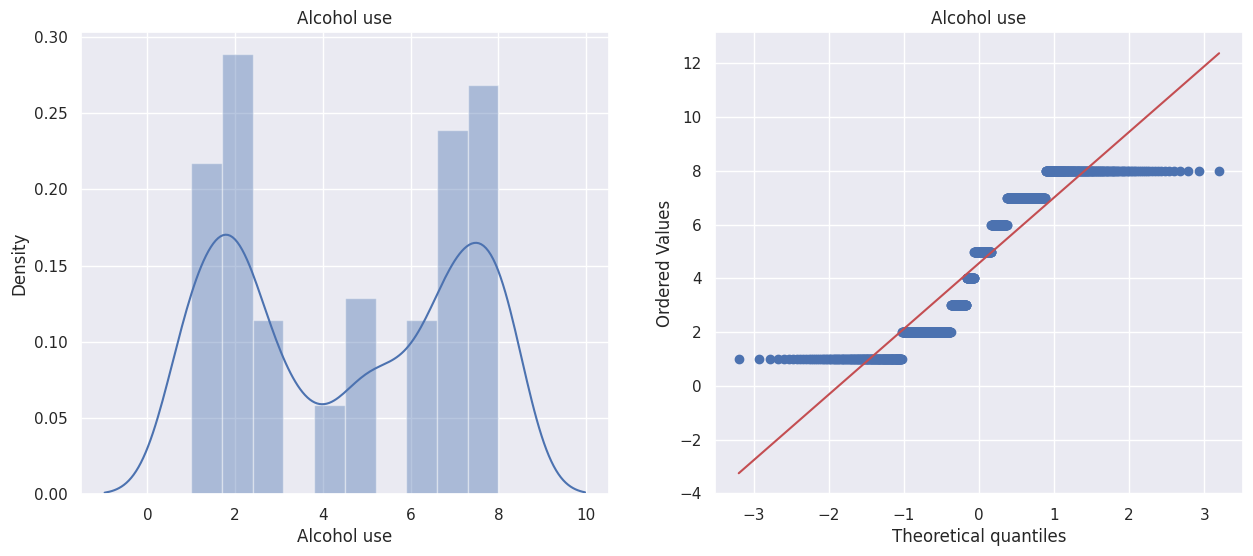

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


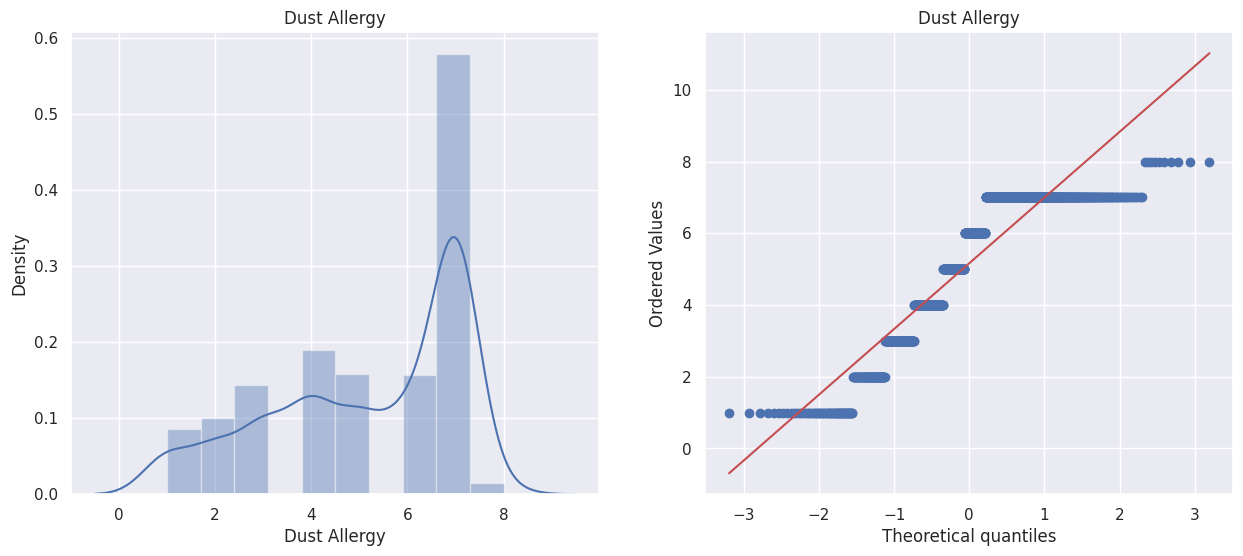

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


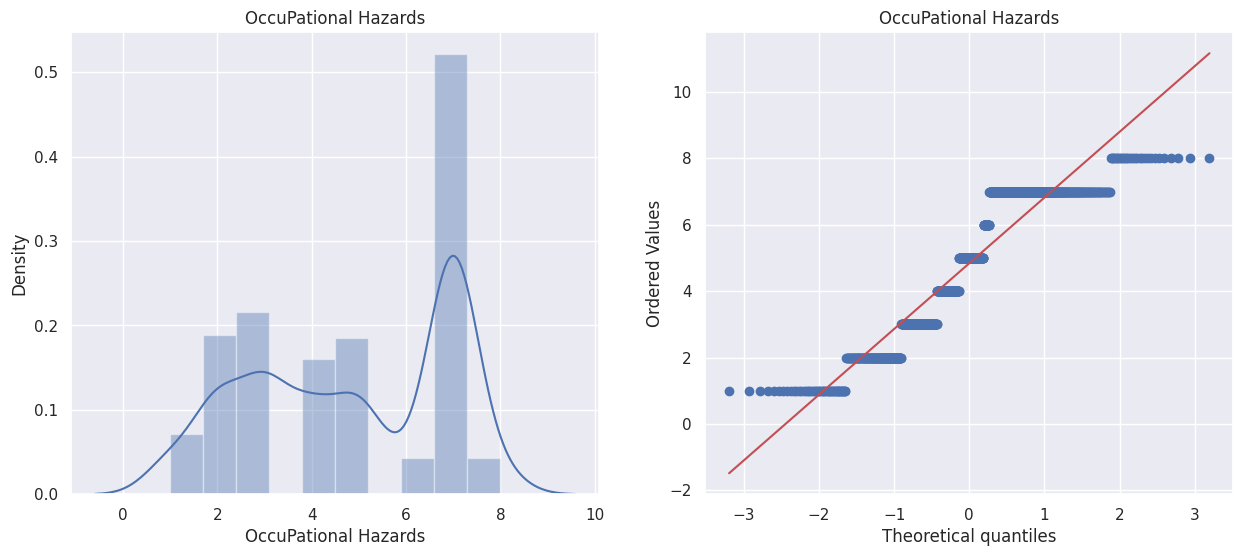

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


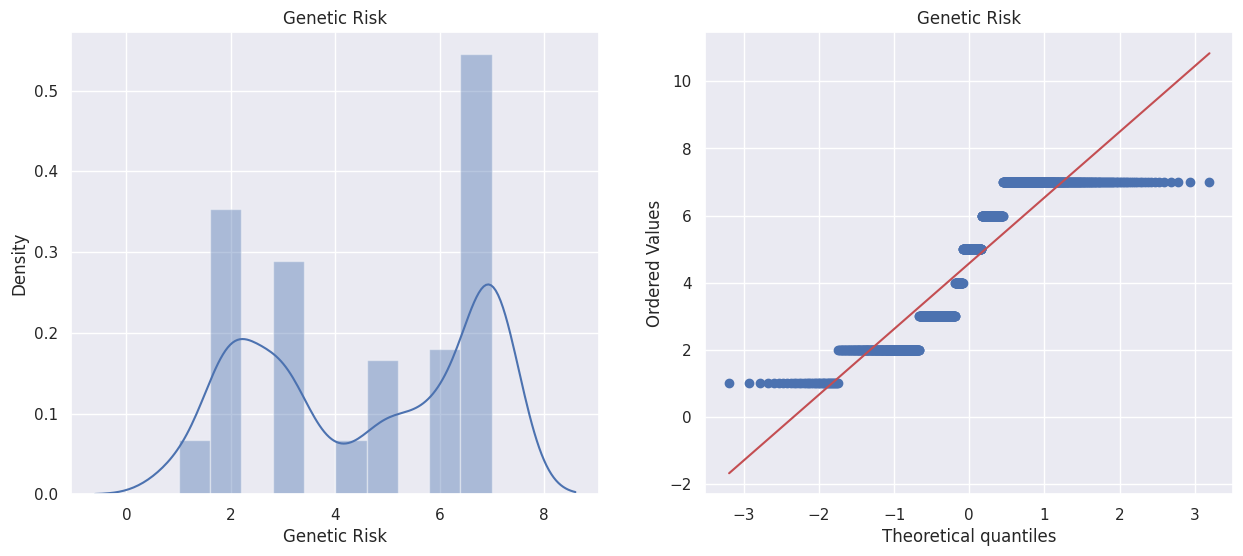

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


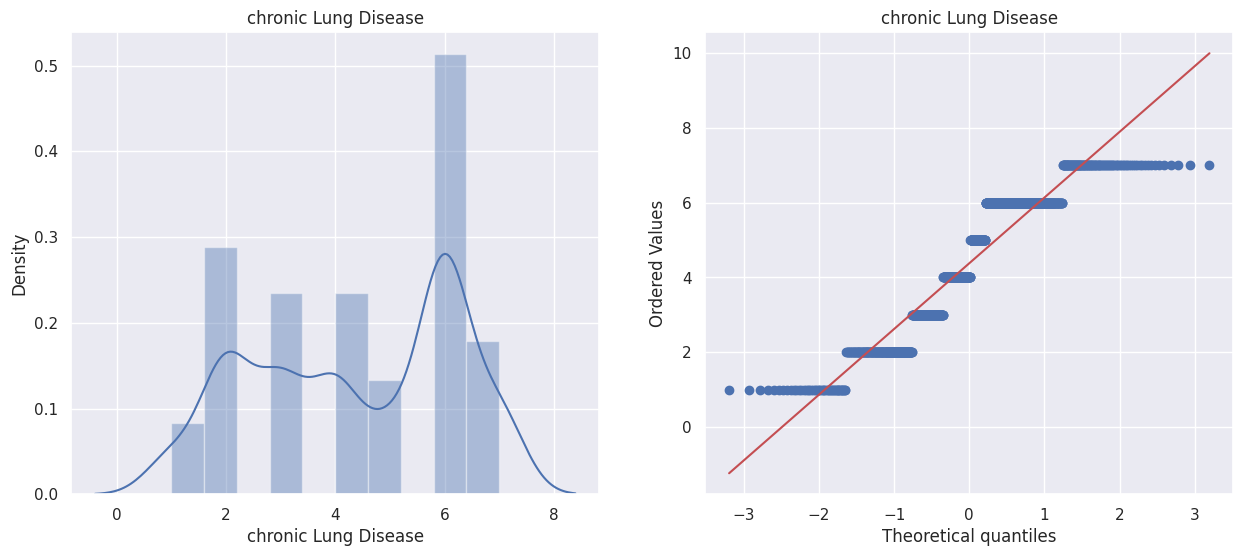

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


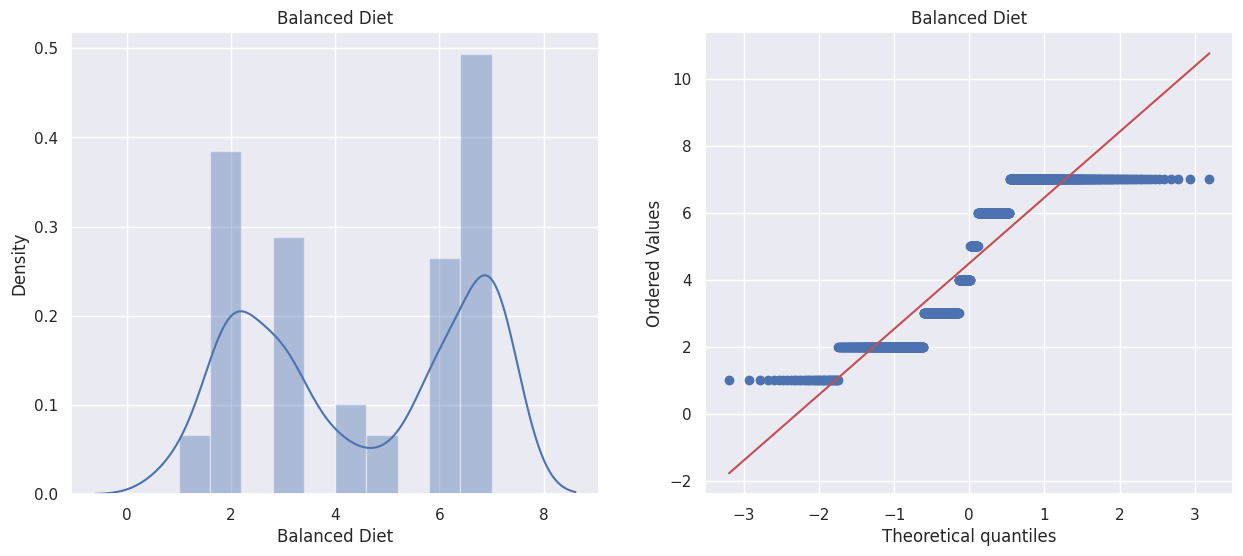

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


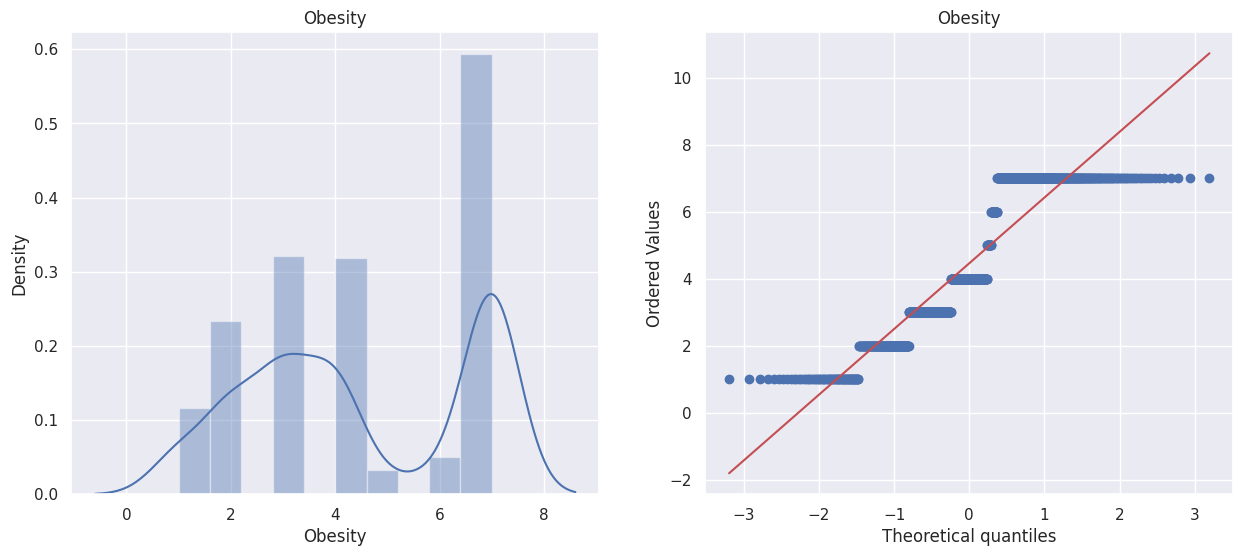

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


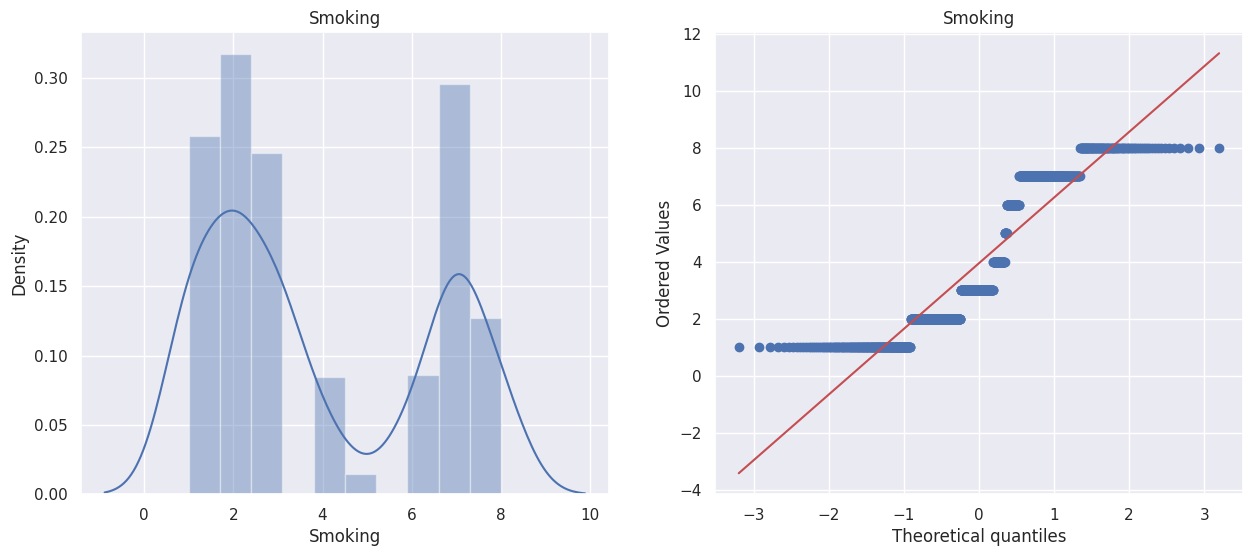

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


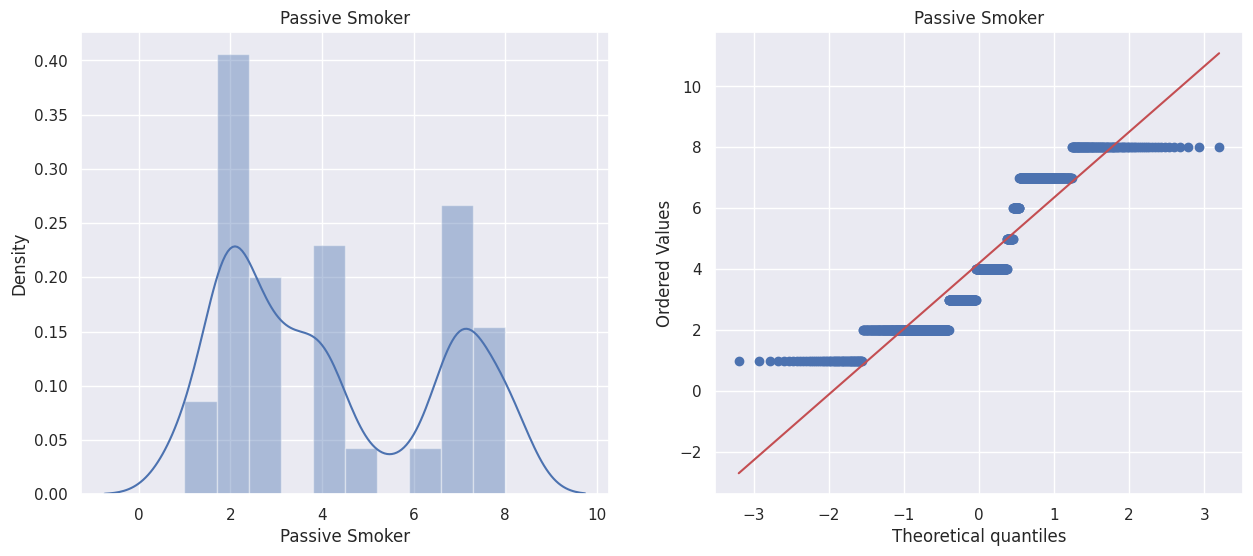

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


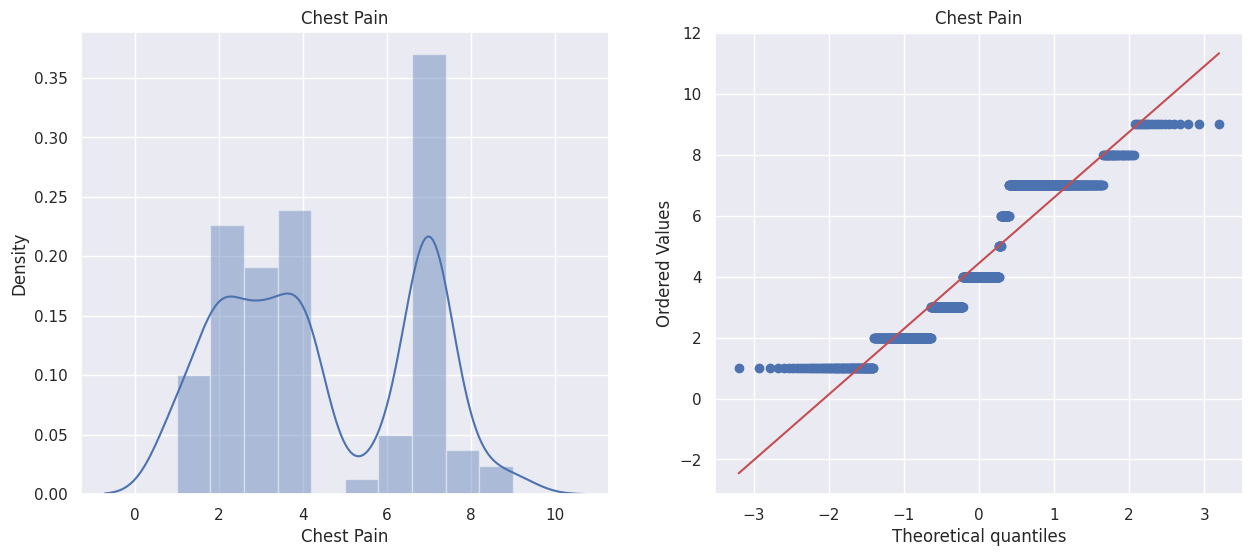

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


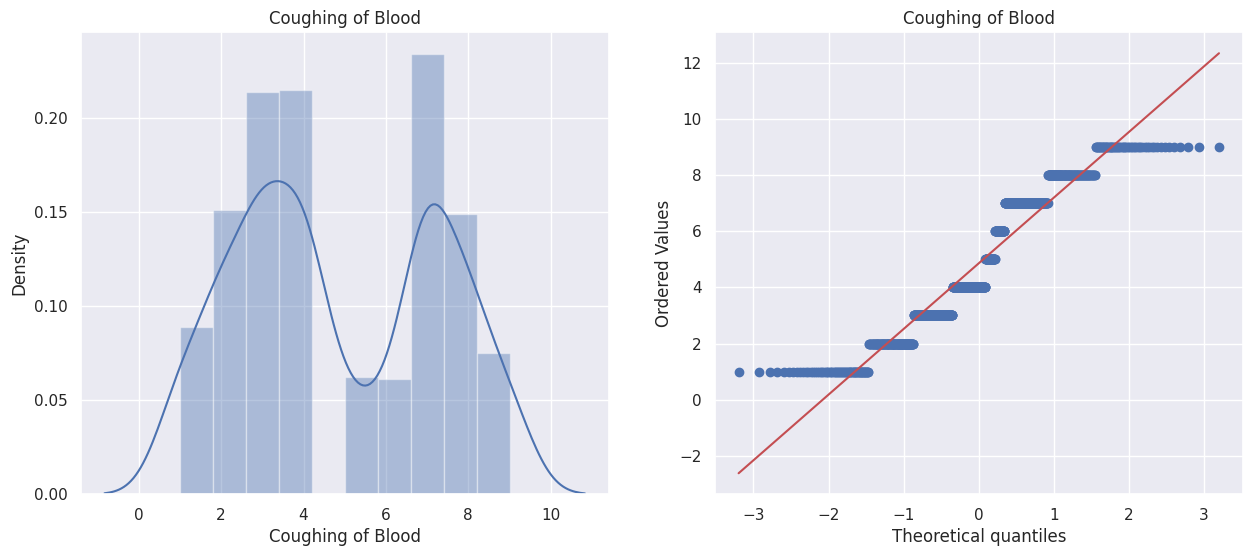

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


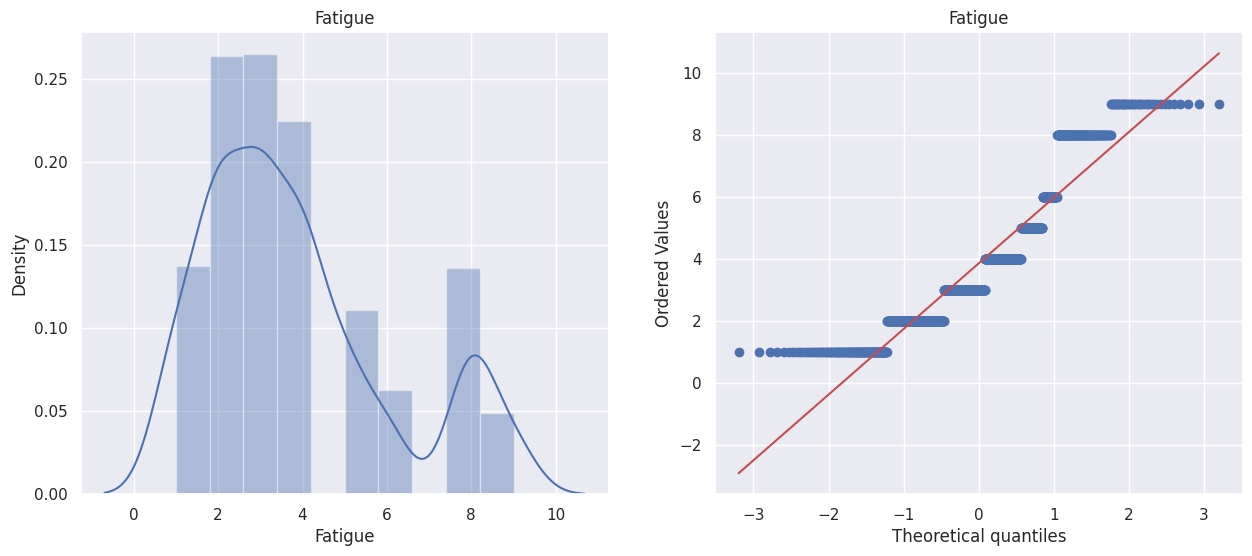

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


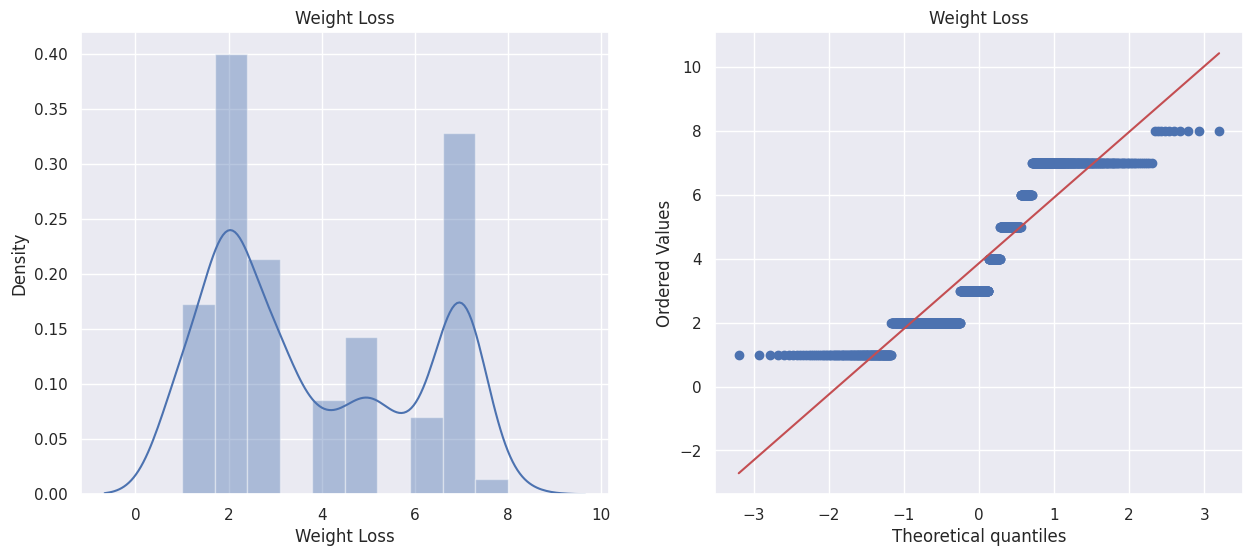

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


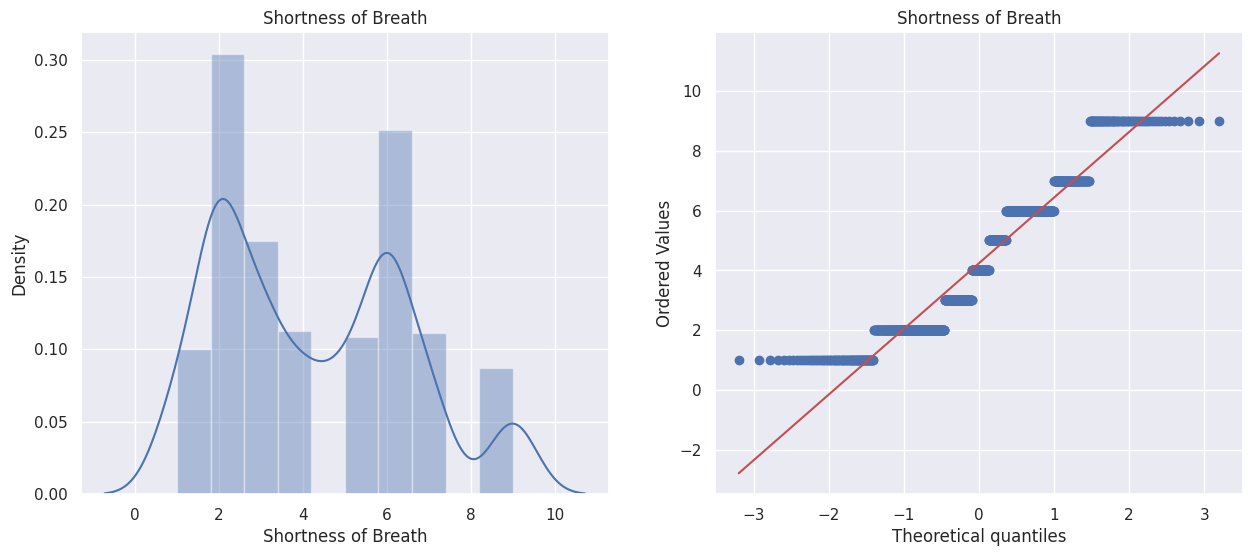

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


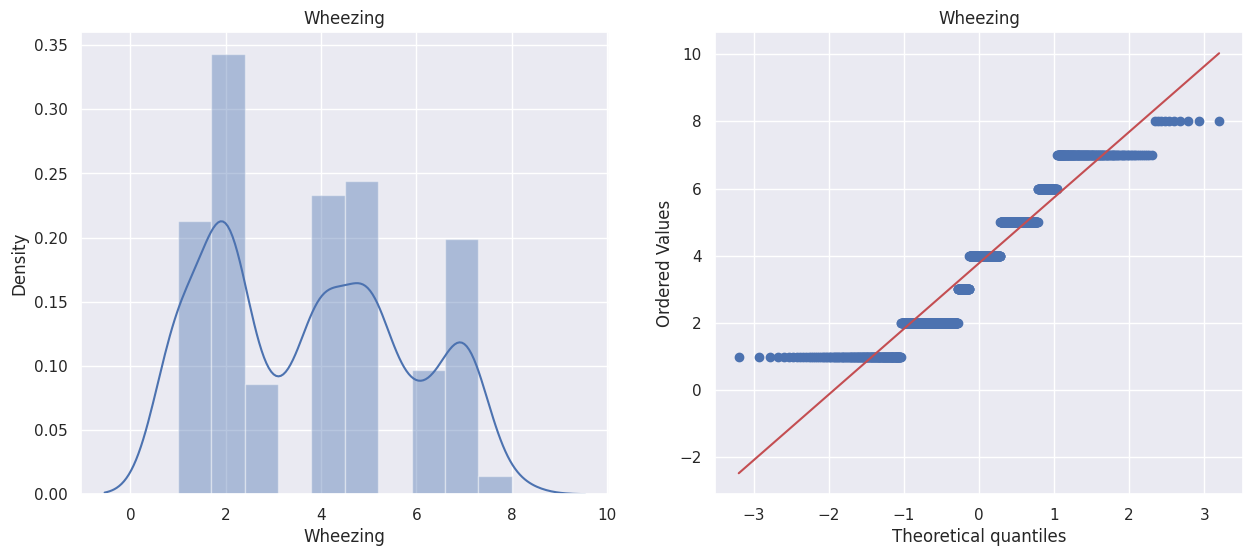

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


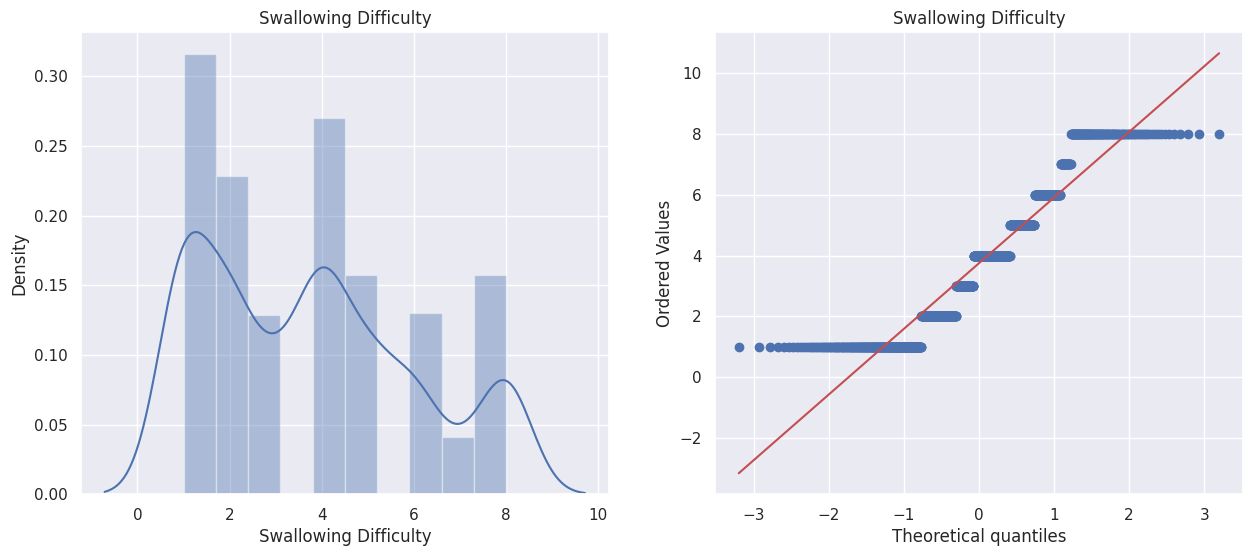

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


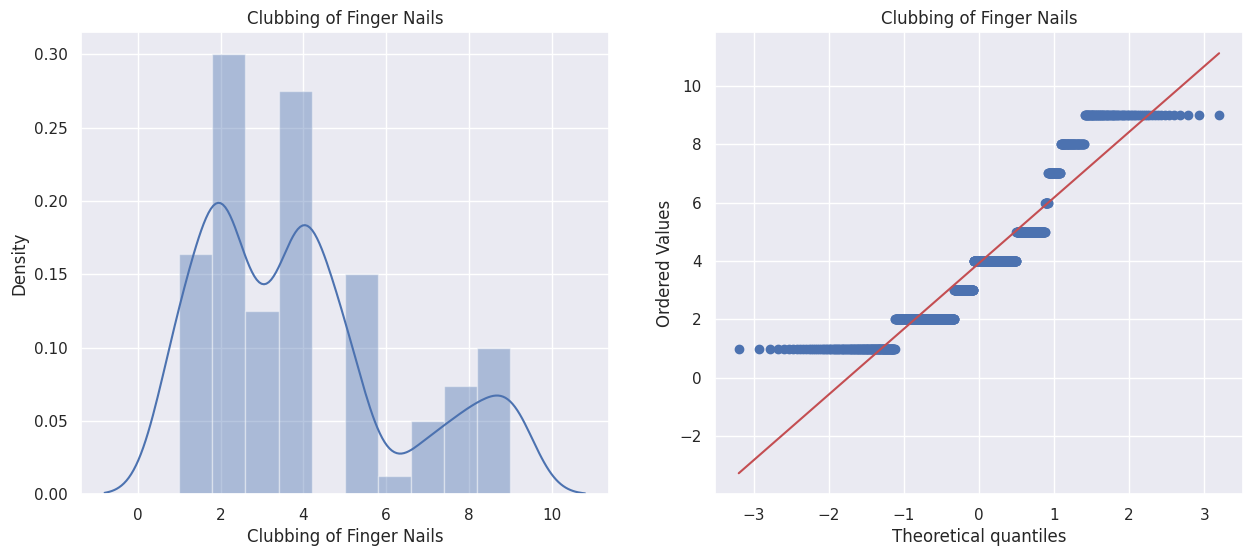

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


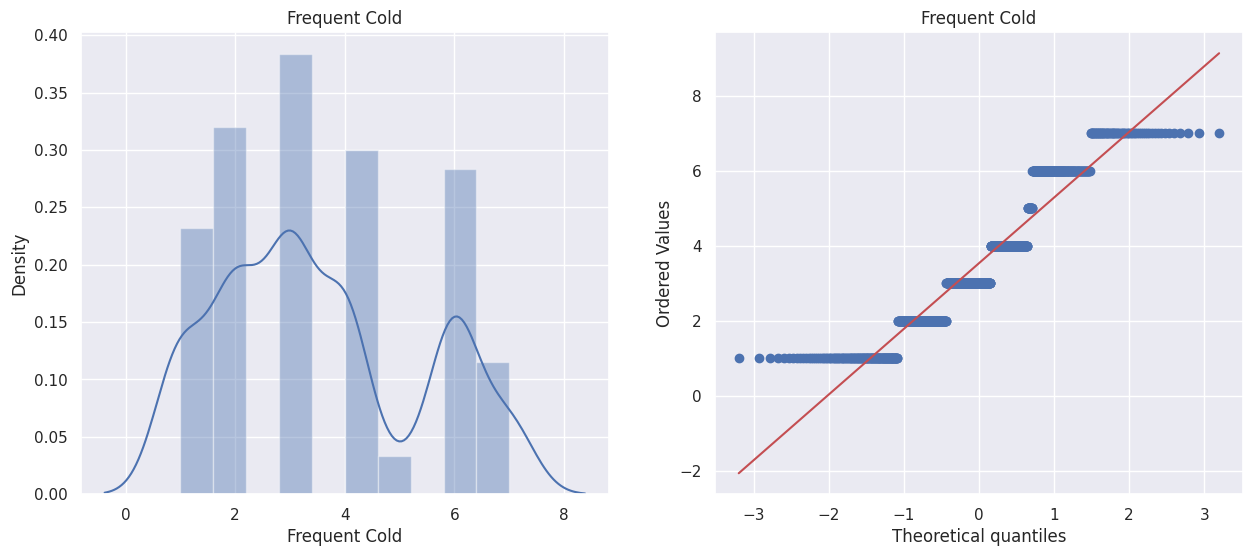

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


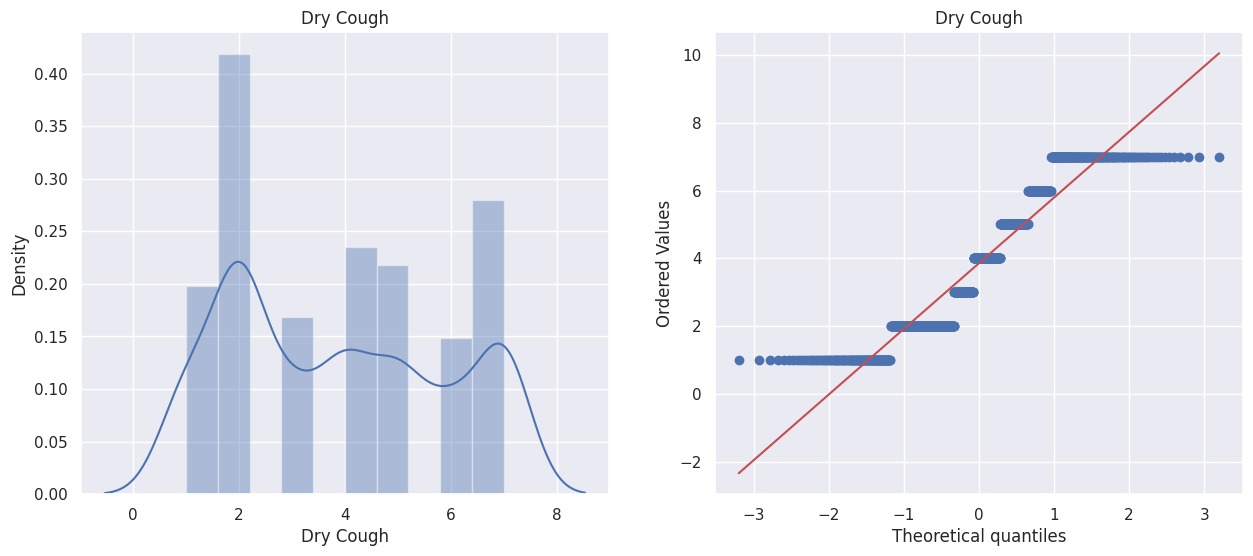

<ipython-input-171-a31d4fb8b7dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


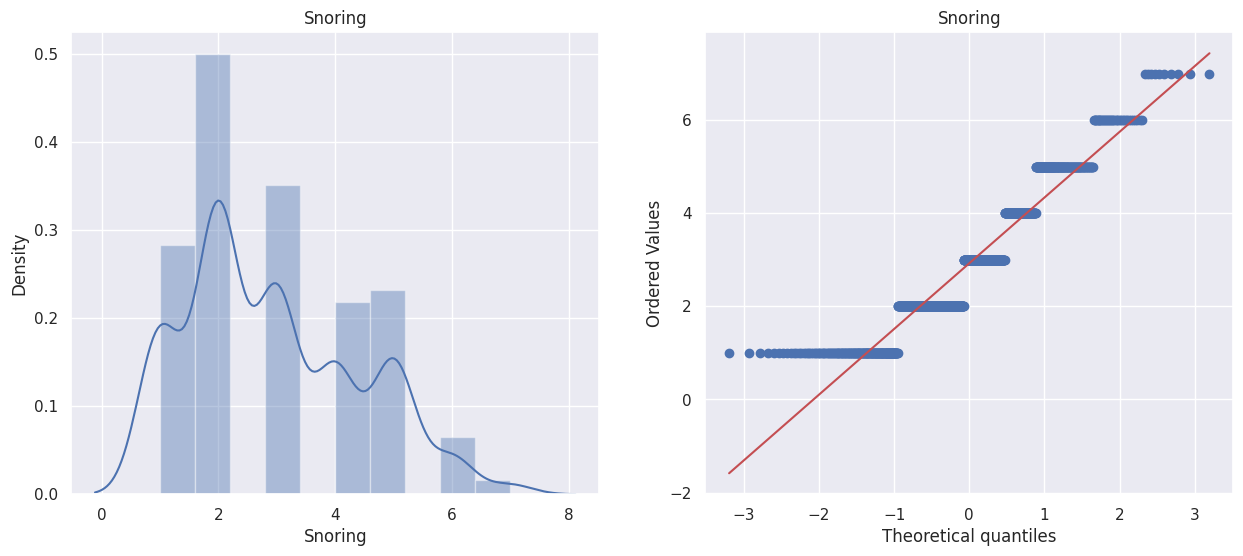

In [171]:
num_cols = df.select_dtypes(["float64","int64"])
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #df[variable].hist()
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

#### **Convert Categorical Data To Numerical**

In [172]:
le = LabelEncoder()
Label = df.select_dtypes(include=["object"])
df = df.copy()

for i in Label:
  df[i] = le.fit_transform(df[i])

df.shape

(1000, 26)

In [173]:
df.head()

index  Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0           0  33.0       1              2            4             5   
1      1           1  17.0       1              3            1             5   
2      2           2  35.0       1              4            5             6   
3      3           3  37.0       1              7            7             7   
4      4           4  46.0       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1              2          3        4      1  
1                         2              1          7        2      2  
2                         4              6          7        2      0  
3                         5              6          7        5      0  
4                         2              4          2        3      0  

[5 rows x 26 columns]

In [257]:
df.iloc[:,-1]

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64

In [174]:
X = df.iloc[:,2:25]
Y = df.iloc[:,-1]

In [175]:
X.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0  33.0       1              2            4             5   
1  17.0       1              3            1             5   
2  35.0       1              4            5             6   
3  37.0       1              7            7             7   
4  46.0       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  \
0        4  ...                  4        3            4                    2   
1        2  ...                  3        1            3                    7   
2        7  ...                  8        8            7                    9   
3        7  ...                  8        4            2                    3   
4        7  ...                  9        3            2                    4   

   Wheezing  Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0         2                      3                         1              2   
1         8                      6                         2              1   
2         2                      1                         4              6   
3         1                      4                         5              6   
4         1                      4                         2              4   

   Dry Cough  Snoring  
0          3        4  
1          7        2  
2          7        2  
3          7        5  
4          2        3  

[5 rows x 23 columns]

In [256]:
Y

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64

# **Feature Engineering**

#### **Mutual Information**

In [176]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

Gender                      0.000000
Snoring                     0.110750
Swallowing Difficulty       0.148515
Frequent Cold               0.231064
Weight Loss                 0.236030
Dry Cough                   0.283007
Clubbing of Finger Nails    0.288701
Age                         0.347935
chronic Lung Disease        0.359142
Fatigue                     0.391270
Air Pollution               0.393316
Genetic Risk                0.406658
Shortness of Breath         0.415129
OccuPational Hazards        0.415708
Smoking                     0.433691
Dust Allergy                0.447152
Balanced Diet               0.483101
Wheezing                    0.502561
Chest Pain                  0.505141
Alcohol use                 0.534074
Obesity                     0.559983
Coughing of Blood           0.577779
Passive Smoker              0.603741
dtype: float64

<Axes: >

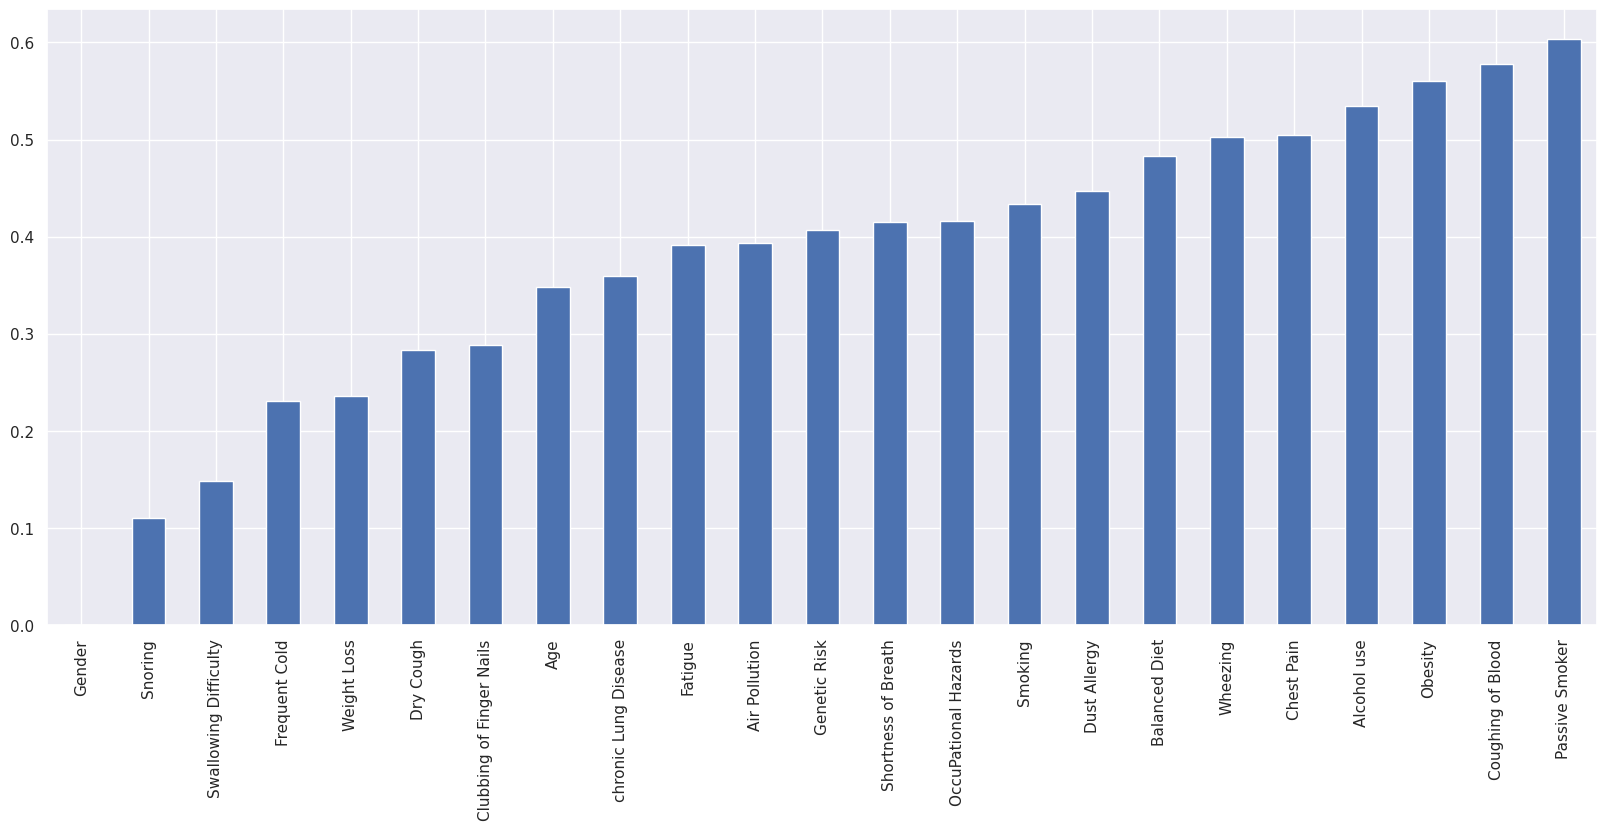

In [177]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20, 8))

#### **Splitting Data into Train And Test**

In [178]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3, random_state=0)

In [179]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (700, 23)
train_label :  (700,)
test_data :  (300, 23)
test_label :  (300,)


#### **Normalize The Data**

In [180]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [181]:
train_data_sc

array([[ 0.03413479,  1.21387736,  1.50954409, ...,  1.32578794,
         1.49563496,  1.40644191],
       [ 2.06424152, -0.82380645,  1.01737788, ...,  0.24603046,
        -0.9425217 ,  0.048498  ],
       [ 0.68376895,  1.21387736, -1.4434532 , ...,  0.24603046,
        -0.9425217 ,  1.40644191],
       ...,
       [-1.18392924, -0.82380645,  1.01737788, ..., -0.29384829,
         0.03274096, -0.63047396],
       [ 0.03413479, -0.82380645,  1.50954409, ...,  1.32578794,
         1.49563496,  1.40644191],
       [-0.04706947, -0.82380645,  1.01737788, ...,  1.86566669,
         1.00800363, -0.63047396]])

#### **PCA**

In [182]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [183]:
explained_variance = pc.explained_variance_ratio_

In [184]:
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.40143189 0.11595519 0.0809727  0.063913   0.05872856 0.05202227
 0.03768021 0.03081583 0.02463855 0.02241642 0.02146209 0.0159059
 0.01525445 0.01406892 0.00975376 0.00926771 0.00692823 0.00502174
 0.00426276 0.00370965 0.00322876 0.00158369 0.00097771]


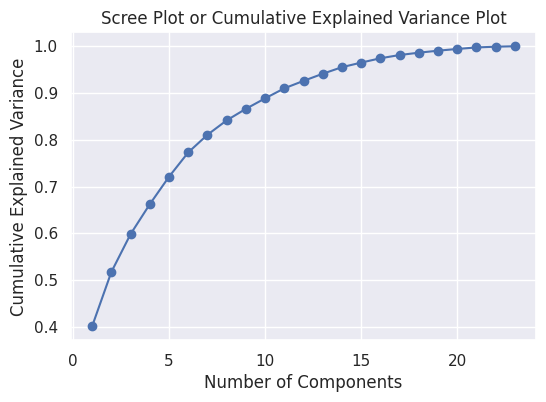

In [185]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [186]:

# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 14


In [187]:
pc = PCA(n_components=14)
train_data_sc_pc_select = pc.fit_transform(train_data_sc)
test_data_sc_pc_select = pc.fit_transform(test_data_sc)

In [188]:
explained_variance = pc.explained_variance_ratio_

In [189]:
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.40143189 0.11595519 0.0809727  0.063913   0.05872856 0.05202227
 0.03768021 0.03081583 0.02463855 0.02241642 0.02146209 0.0159059
 0.01525445 0.01406892]


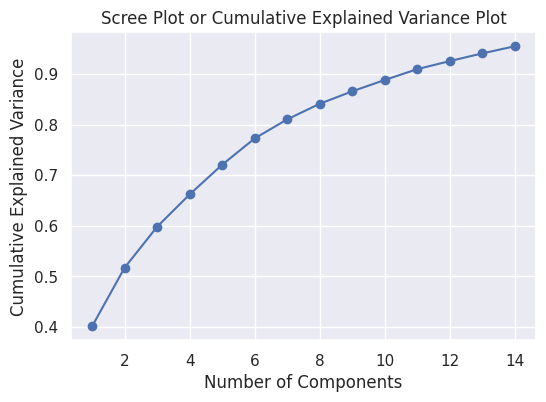

In [190]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# **Models**

In [191]:
accuracy_results = {}

#### **Logistic Regression Model**

In [192]:
model_lr = LogisticRegression().fit(train_data_sc_pc_select,train_label)

In [193]:
y_pred = model_lr.predict(test_data_sc_pc_select)
y_pred

array([1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1])

In [194]:
print("Accuracy Score : ", accuracy_score(y_pred, test_label))

Accuracy Score :  0.21


In [195]:
confusion_matrix(y_pred, test_label)

array([[ 0, 87, 21],
       [80,  0,  9],
       [28, 12, 63]])

In [196]:
print(classification_report(y_pred, test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00      0.00      0.00        89
           2       0.68      0.61      0.64       103

    accuracy                           0.21       300
   macro avg       0.23      0.20      0.21       300
weighted avg       0.23      0.21      0.22       300



In [197]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc_pc_select,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  0.9833333333333334


In [198]:
accuracy_results["Logistic_Regression_Accuracy"] = train_accuracy_lr

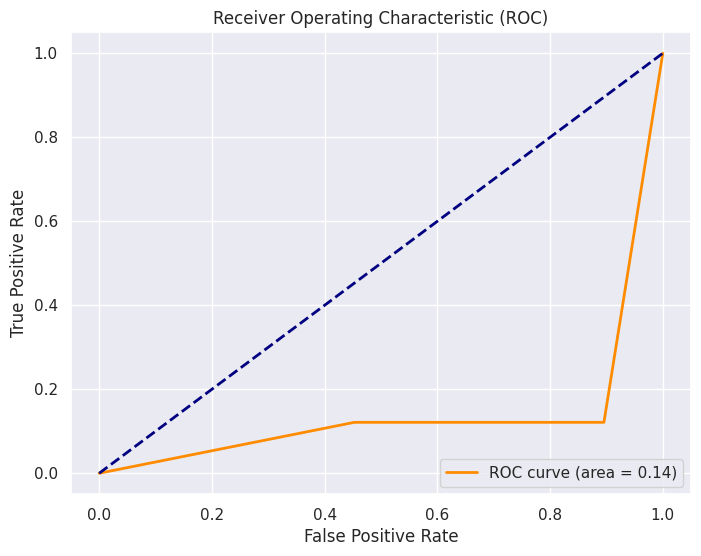

In [199]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **Random Forest Model**

In [210]:
model_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100).fit(train_data_sc_pc_select,train_label)

In [211]:
y_pred_2 = model_rf.predict(test_data_sc_pc_select)
y_pred_2

array([1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1])

In [212]:
print("Accuracy Score : ",accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.16


In [213]:
confusion_matrix(y_pred_2, test_label)

array([[ 0, 81, 48],
       [80, 12,  9],
       [28,  6, 36]])

In [214]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.12      0.12      0.12       101
           2       0.39      0.51      0.44        70

    accuracy                           0.16       300
   macro avg       0.17      0.21      0.19       300
weighted avg       0.13      0.16      0.14       300



In [215]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc_pc_select,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_rf)
print("Test Data Cross_val_score : ",test_accuracy_rf)

 Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  1.0


In [216]:
accuracy_results["Random_Forest_Accuracy"] = train_accuracy_rf

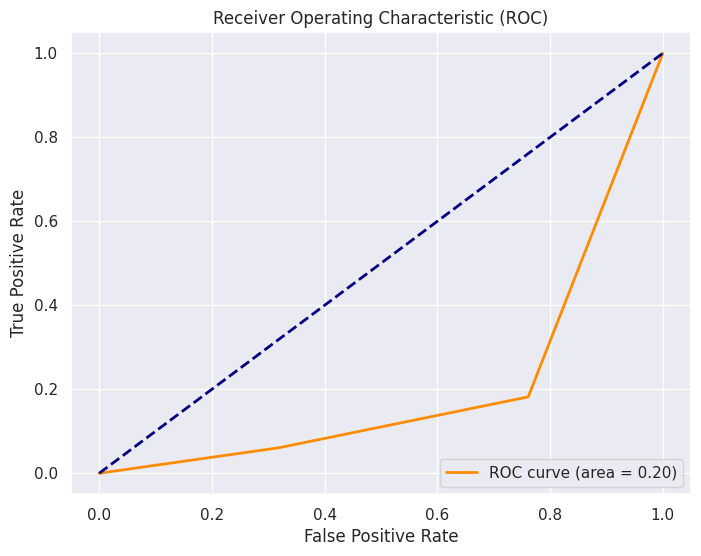

In [217]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [208]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc_select, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0


#### **Decision Tree Model**

In [228]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2).fit(train_data_sc_pc_select,train_label)

In [229]:
y_pred_3 = model_tree.predict(test_data_sc_pc_select)
y_pred_3

array([1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1])

In [230]:
print("Accuracy Score : ",accuracy_score(y_pred_3,test_label))

Accuracy Score :  0.08666666666666667


In [231]:
confusion_matrix(y_pred_3,test_label)

array([[ 9, 87, 38],
       [75,  0, 38],
       [24, 12, 17]])

In [232]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

           0       0.08      0.07      0.07       134
           1       0.00      0.00      0.00       113
           2       0.18      0.32      0.23        53

    accuracy                           0.09       300
   macro avg       0.09      0.13      0.10       300
weighted avg       0.07      0.09      0.07       300



In [233]:
train_accuracy_tree = cross_val_score(model_tree,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc_pc_select,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_tree)
print("Test Data Cross_val_score : ",test_accuracy_tree)

 Train Data Cross_val_score :  0.9971428571428571
Test Data Cross_val_score :  0.9966666666666667


In [234]:
accuracy_results["Decision_Tree_Accuracy"] = train_accuracy_tree

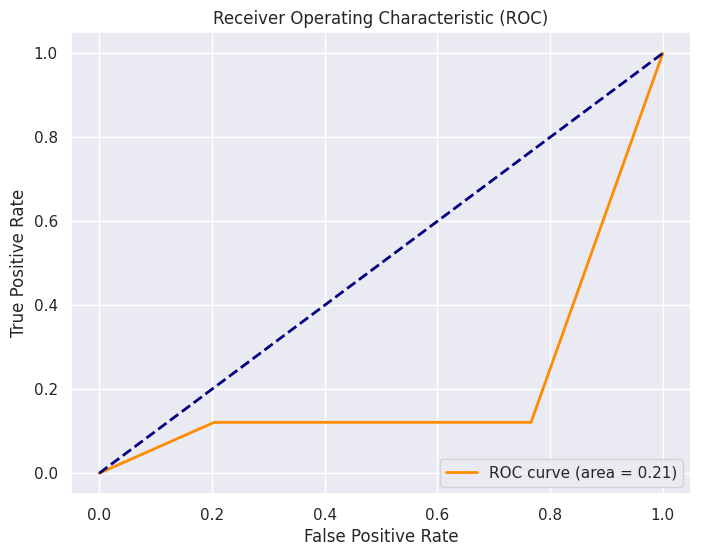

In [235]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [227]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc_select, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9957142857142858


#### **KNN Model**

In [237]:
model_knn = KNeighborsClassifier().fit(train_data_sc_pc_select,train_label)

In [238]:
y_pred_4 = model_knn.predict(test_data_sc_pc_select)
y_pred_4

array([1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1])

In [239]:
print("Accuracy Score : ",accuracy_score(y_pred_4,test_label))

Accuracy Score :  0.2


In [240]:
confusion_matrix(y_pred_4,test_label)

array([[ 0, 87,  5],
       [76,  1, 29],
       [32, 11, 59]])

In [241]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.01      0.01      0.01       106
           2       0.63      0.58      0.61       102

    accuracy                           0.20       300
   macro avg       0.21      0.20      0.20       300
weighted avg       0.22      0.20      0.21       300



In [242]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_knn)
print("Test Data Cross_val_score : ",test_accuracy_knn)

 Train Data Cross_val_score :  0.9928571428571429
Test Data Cross_val_score :  0.9733333333333333


In [243]:
accuracy_results["KNeighborsClassifier_Accuracy"] = train_accuracy_knn

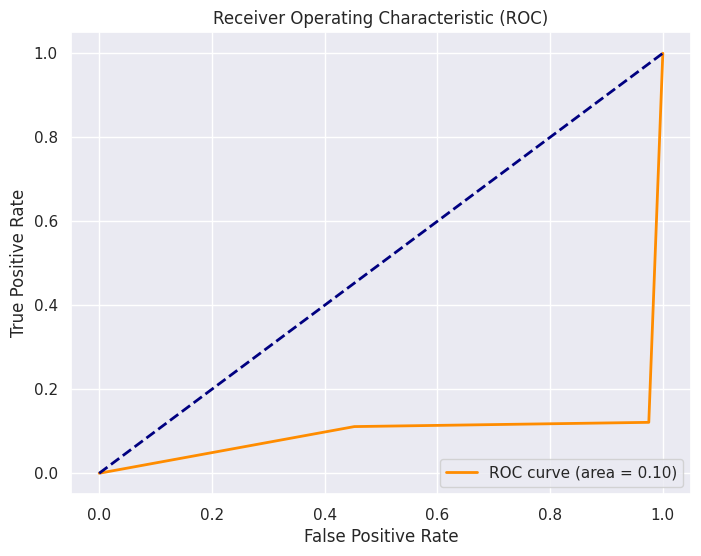

In [245]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_4, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **XGBOOSt Model**

In [251]:
model_xgb = xgboost.XGBClassifier().fit(train_data_sc_pc_select,train_label)

In [253]:
y_pred_5 = model_xgb.predict(test_data_sc_pc_select)
y_pred_5

array([1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1])

In [254]:
print("Accuracy Score : ",accuracy_score(y_pred_5,test_label))

Accuracy Score :  0.09666666666666666


In [255]:
confusion_matrix(y_pred_5,test_label)

array([[ 0, 87, 56],
       [79,  8, 16],
       [29,  4, 21]])

In [258]:
print(classification_report(y_pred_5,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.08      0.08      0.08       103
           2       0.23      0.39      0.29        54

    accuracy                           0.10       300
   macro avg       0.10      0.16      0.12       300
weighted avg       0.07      0.10      0.08       300



In [259]:
train_accuracy_xgb = cross_val_score(model_xgb,train_data_sc,train_label,cv=5).mean()
test_accuracy_xgb = cross_val_score(model_xgb,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_xgb)
print("Test Data Cross_val_score : ",test_accuracy_xgb)

 Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  1.0


In [260]:
accuracy_results["XGBOOSt_Accuracy"] = train_accuracy_xgb

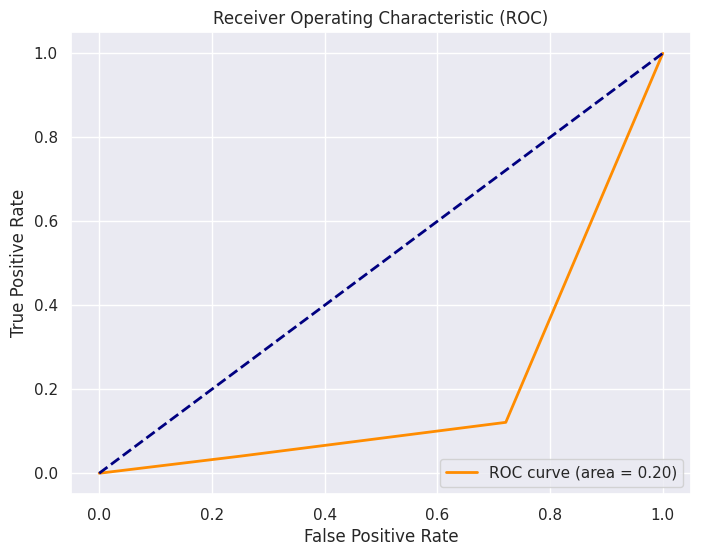

In [262]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_5,pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **SVC Model**

In [264]:
model_svc = SVC().fit(train_data_sc_pc_select,train_label)

In [265]:
y_pred_6 = model_svc.predict(test_data_sc_pc_select)
y_pred_6

array([1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1])

In [266]:
print("Accuracy Score : ",accuracy_score(y_pred_6,test_label))

Accuracy Score :  0.22666666666666666


In [267]:
confusion_matrix(y_pred_6,test_label)

array([[ 0, 87, 13],
       [71,  0, 12],
       [37, 12, 68]])

In [268]:
print(classification_report(y_pred_6,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00        83
           2       0.73      0.58      0.65       117

    accuracy                           0.23       300
   macro avg       0.24      0.19      0.22       300
weighted avg       0.29      0.23      0.25       300



In [269]:
train_accuracy_svc = cross_val_score(model_svc,train_data_sc,train_label,cv=5).mean()
test_accuracy_svc = cross_val_score(model_svc,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_svc)
print("Test Data Cross_val_score : ",test_accuracy_svc)

 Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  1.0


In [270]:
accuracy_results["SVC_Accuracy"] = train_accuracy_xgb

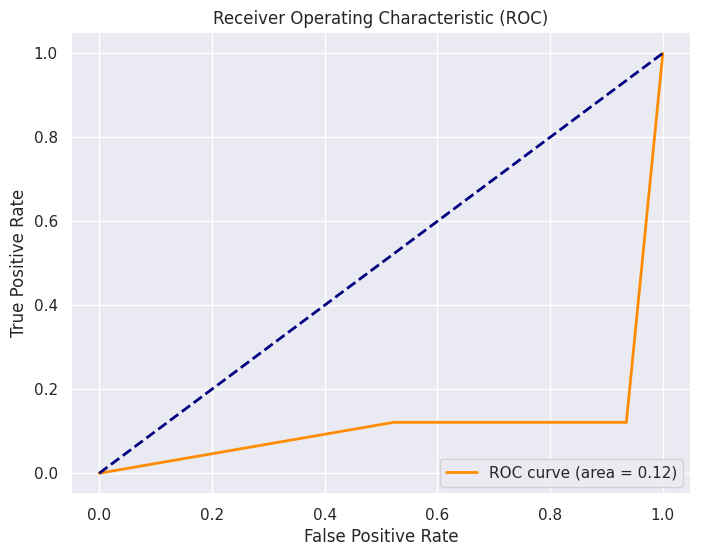

In [272]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_6, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# **Comparison of Classification Model Accuracies**

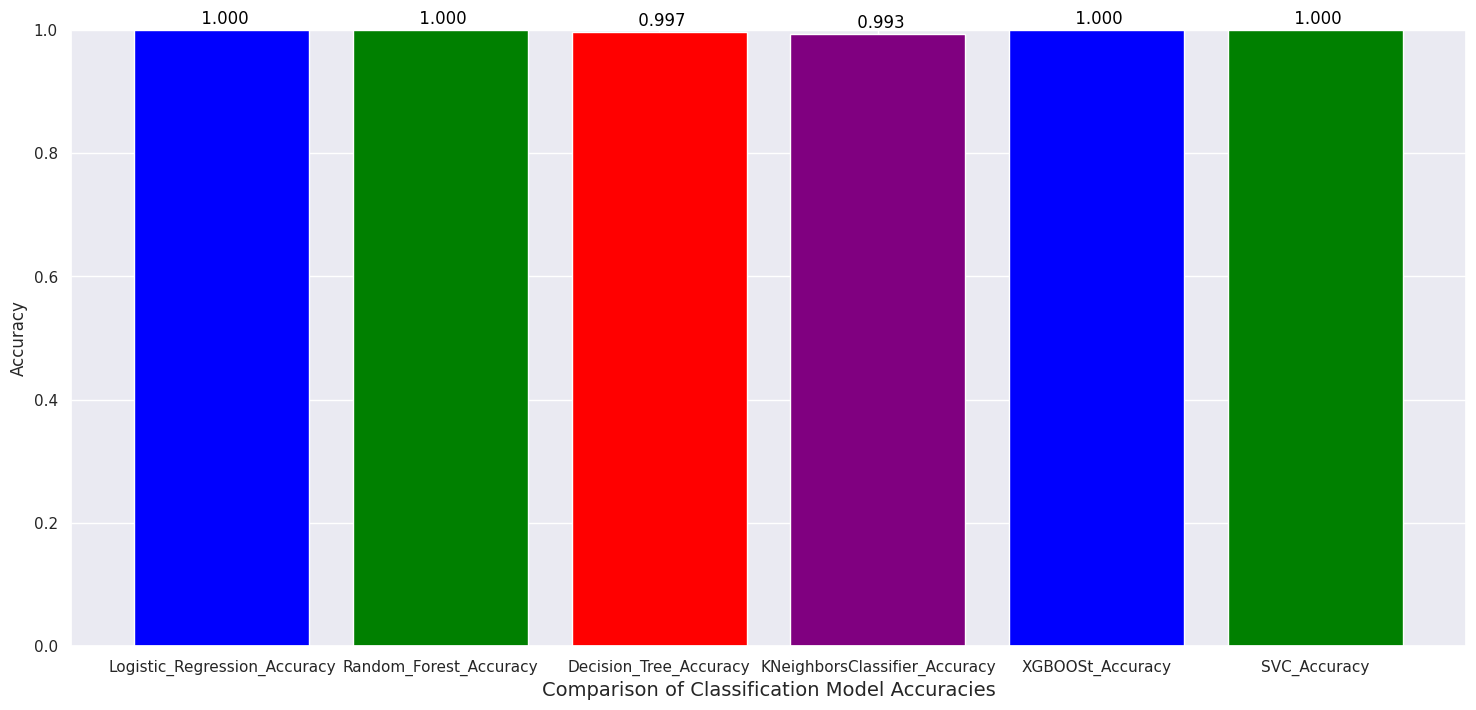

In [275]:
# Plotting the accuracy results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plotting the accuracy results using a different style
plt.figure(figsize=(18, 8))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.xlabel('Comparison of Classification Model Accuracies', fontsize=14)
plt.ylim(0, 1)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')

plt.show()